# A group project (Final file)

## Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# display maximum 999 rows in a DataFrame
pd.set_option("display.max_rows", 999)

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12


# Ignore useless warnings (see SciPy issue #5998)
import warnings

warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Once loaded, automatically format syntactically correct jupyter cells once they are run.
import jupyter_black

jupyter_black.load()

In [2]:
# Using the dataset that we received in Week 2 of AI Booster to clean it

df_mod = pd.read_csv("data/california_houses_mod.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20654 entries, 0 to 20653
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20654 non-null  float64
 1   Median_Income             20654 non-null  float64
 2   Median_Age                20607 non-null  float64
 3   Tot_Rooms                 20607 non-null  float64
 4   Tot_Bedrooms              20607 non-null  float64
 5   Population                20654 non-null  float64
 6   Households                20654 non-null  float64
 7   Latitude                  20654 non-null  float64
 8   Longitude                 20654 non-null  float64
 9   Distance_to_coast         20654 non-null  float64
 10  Distance_to_LA            20654 non-null  float64
 11  Distance_to_SanDiego      20654 non-null  float64
 12  Distance_to_SanJose       20654 non-null  float64
 13  Distance_to_SanFrancisco  20654 non-null  float64
 14  Tot_No

None

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20654.000000   20654.000000  20607.000000  20607.000000   
mean        206859.008521      74.185471     28.638230   2635.554472   
std         115391.970967    5925.379749     12.591488   2180.774851   
min          14999.000000     -55.091700      1.000000      2.000000   
25%         119600.000000       2.562500     18.000000   1447.500000   
50%         179700.000000       3.534700     29.000000   2127.000000   
75%         264700.000000       4.743700     37.000000   3147.500000   
max         500001.000000  584062.237200     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20607.000000  20654.000000  20654.000000  20654.000000  20654.000000   
mean     537.748338   1425.302411    499.375666     35.631504   -119.569465   
std      421.068876   1132.221567    382.344011      2.135876      2.003603   
min        1.000000      3.000000    -98.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
count       20654.000000    2.065400e+04          2.065400e+04   
mean        40499.168256    2.693968e+05          3.981210e+05   
std         49130.495010    2.477182e+05          2.893975e+05   
min           120.676447    4.205891e+02          4.849180e+02   
25%          9079.756762    3.211125e+04          1.594146e+05   
50%         20521.624925    1.736264e+05          2.146241e+05   
75%         49824.747685    5.271382e+05          7.057935e+05   
max        333804.686371    1.018260e+06          1.196919e+06   

       Distance_to_SanJose  Distance_to_SanFrancisco  Tot_No_Bedrooms  \
count         20654.000000              20654.000000     20654.000000   
mean         349205.216365             386711.388384      2097.530551   
std          217173.597449             250143.860258      1796.213255   
min             569.448118                456.141313         0.000000   
25%          113072.904889             117332.993656      1126.000000   
50%          459800.789707             526561.271568      1681.000000   
75%          516946.490963             584562.195811      2509.000000   
max          836762.678210             903627.663298     33110.000000   

            Max_Age  
count  20654.000000  
mean      43.153239  
std       12.947424  
min        9.000000  
25%       33.000000  
50%       43.000000  
75%       52.000000  
max       76.000000

C:\Users\ZH\AppData\Local\Temp\ipykernel_8344\3956871097.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_mod.hist(bins=50, ax=ax)


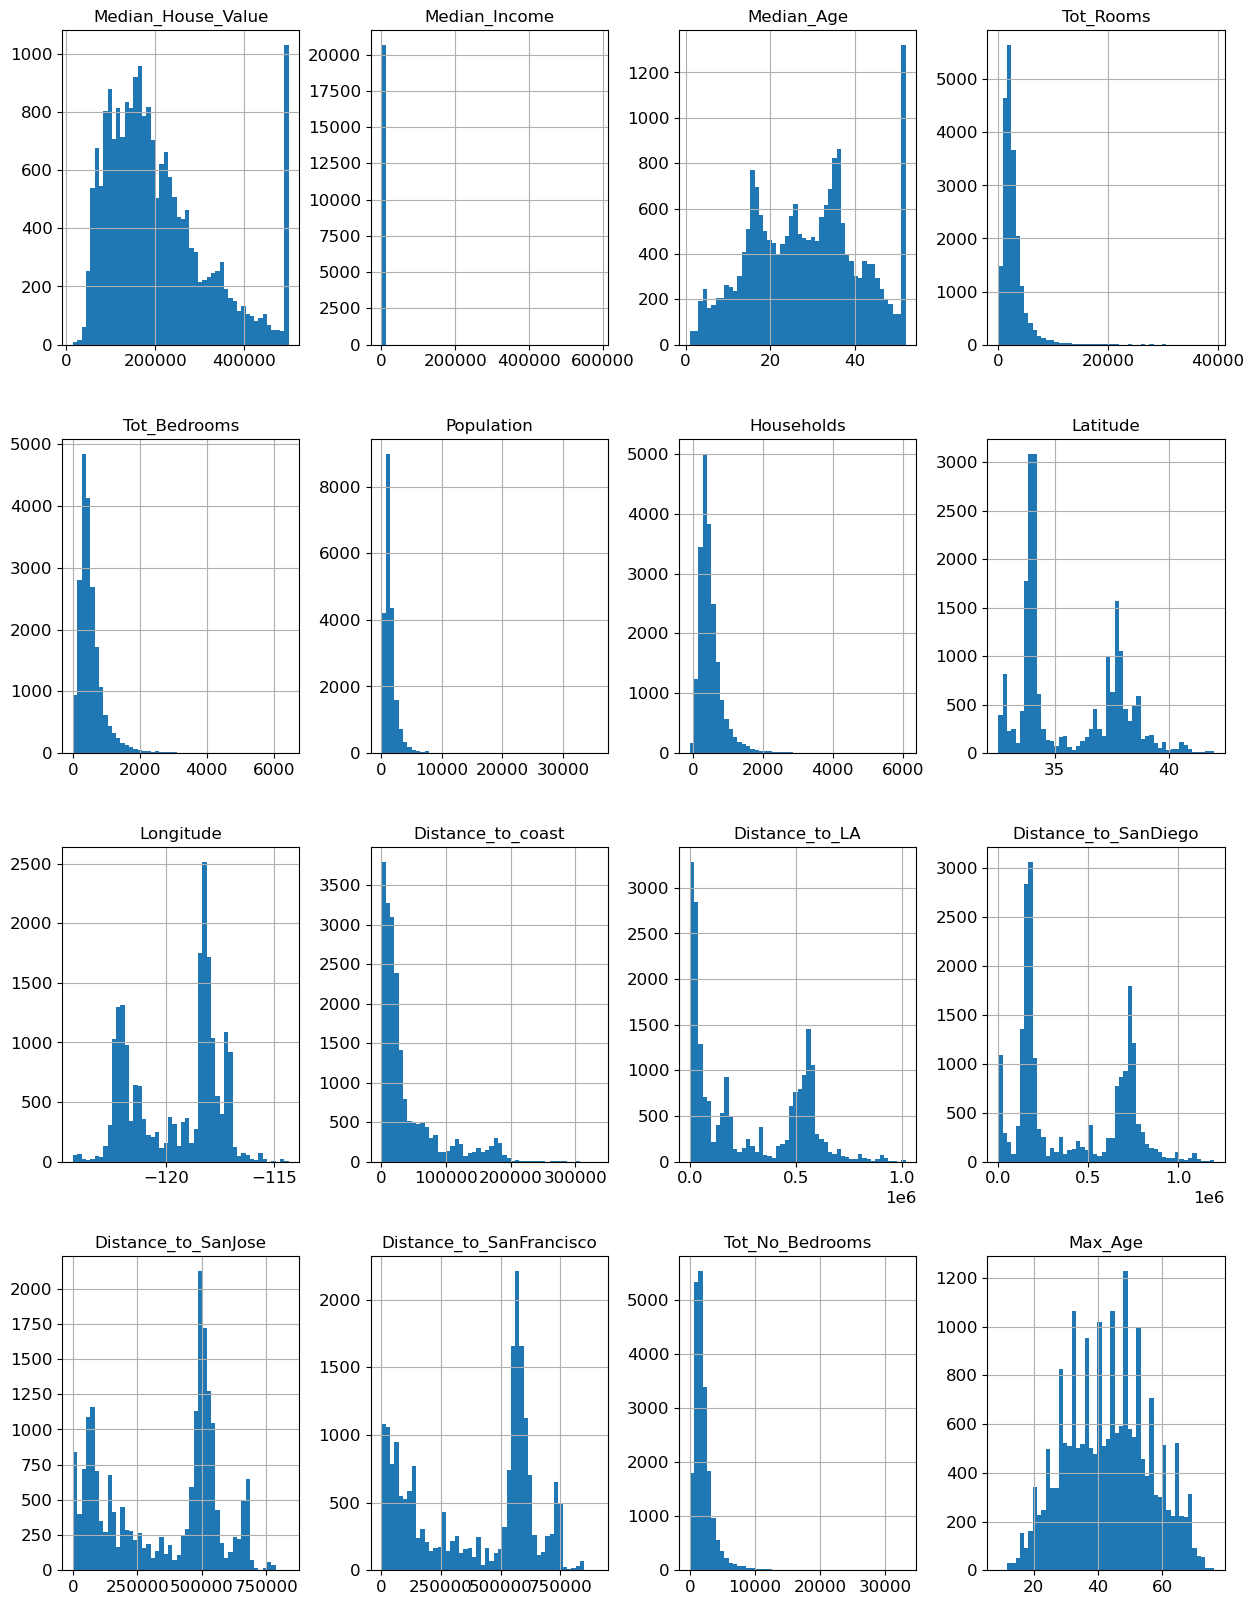

In [3]:
display(df_mod.info())
# All the variable in the dataset are quantitative

# To get more details about each quantitative variable in the dataset
display(df_mod.describe())

# Getting the distribution of the variables
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
df_mod.hist(bins=50, ax=ax)
plt.show()

Initial Analysis: 

Null values: 47 in 3 columns

Negative Values

Minimum value of Median Age: 2
Minimum value of Max Age: 9

Median_House_Value: There is a peak at the end of Median_House_Value. Need to explore. 



##### Data Cleaning (Week 2)

Identify and fix issues in the dataset (spoiler alert: there are many!)


1. <b>Reordering Columns</b>: 
We decided to reorder the columns to bring the contextualy relevant columns together. Since the data is already sorted by Latitude and Longitude, we will not sort it by any of the columns at the moment.

In [4]:
# Reorder Columns
df_mod = df_mod[
    [
        "Median_House_Value",
        "Median_Income",
        "Median_Age",
        "Max_Age",
        "Population",
        "Households",
        "Tot_Rooms",
        "Tot_Bedrooms",
        "Tot_No_Bedrooms",
        "Latitude",
        "Longitude",
        "Distance_to_coast",
        "Distance_to_LA",
        "Distance_to_SanDiego",
        "Distance_to_SanJose",
        "Distance_to_SanFrancisco",
    ]
]

df_mod.head()

Median_House_Value  Median_Income  Median_Age  Max_Age  Population  \
0            452600.0         8.3252        41.0     50.0       322.0   
1            358500.0         8.3014        21.0     34.0      2401.0   
2            352100.0         7.2574        52.0     66.0       496.0   
3            341300.0         5.6431        52.0     63.0       558.0   
4            342200.0         3.8462        52.0     68.0       565.0   

   Households  Tot_Rooms  Tot_Bedrooms  Tot_No_Bedrooms  Latitude  Longitude  \
0       126.0      880.0         129.0            751.0     37.88    -122.23   
1      1138.0     7099.0        1106.0           5993.0     37.86    -122.22   
2       177.0     1467.0         190.0           1277.0     37.85    -122.24   
3       219.0     1274.0         235.0           1039.0     37.85    -122.25   
4       259.0     1627.0         280.0           1347.0     37.85    -122.25   

   Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
0        9263.040773   556529.158342         735501.806984   
1       10225.733072   554279.850069         733236.884360   
2        8259.085109   554610.717069         733525.682937   
3        7768.086571   555194.266086         734095.290744   
4        7768.086571   555194.266086         734095.290744   

   Distance_to_SanJose  Distance_to_SanFrancisco  
0         67432.517001              21250.213767  
1         65049.908574              20880.600400  
2         64867.289833              18811.487450  
3         65287.138412              18031.047568  
4         65287.138412              18031.047568

2. <b>Null Value Treatment</b>: 
We computed the number of null values in each row and found 0.23 % null values in 3 columns. We decided to perform KNN imputation. 

In [5]:
from sklearn.impute import KNNImputer

df_mod = pd.DataFrame(KNNImputer().fit_transform(df_mod), columns=df_mod.columns)

3. <b>Negative Value Treatment</b>: Treating the negative values in Median Income and Households variables.

In [6]:
print(
    f""" We have {(df_mod.loc[df_mod["Median_Income"] < 0, "Median_Income"].count())*100/len(df_mod): .5f} % negative values in Median Income
      and {(df_mod.loc[df_mod["Households"] < 0, "Households"].count())*100/len(df_mod): .5f} % negative values in Households"""
)

 We have  0.04842 % negative values in Median Income
      and  0.02905 % negative values in Households


We have very small number of negative values in our dataset so we choose to drop the negative values. 

In [7]:
df_mod = df_mod.loc[((df_mod["Median_Income"] >= 0) & (df_mod["Households"] >= 0)), :]

We have dropped 16 rows.

##### Exploratory Analysis (Week 2)

You should be able de get rid of a quite useless column (obvious one)
Another column was artificially generated, can you find out which one ? Once you found it get rid of it!

Tot_Rooms  Tot_Bedrooms  Tot_No_Bedrooms
0      880.0         129.0            751.0
1     7099.0        1106.0           5993.0
2     1467.0         190.0           1277.0
3     1274.0         235.0           1039.0
4     1627.0         280.0           1347.0

Tot_Rooms  Tot_Bedrooms  Tot_No_Bedrooms
Tot_Rooms         1.000000      0.929892         0.995819
Tot_Bedrooms      0.929892      1.000000         0.894292
Tot_No_Bedrooms   0.995819      0.894292         1.000000

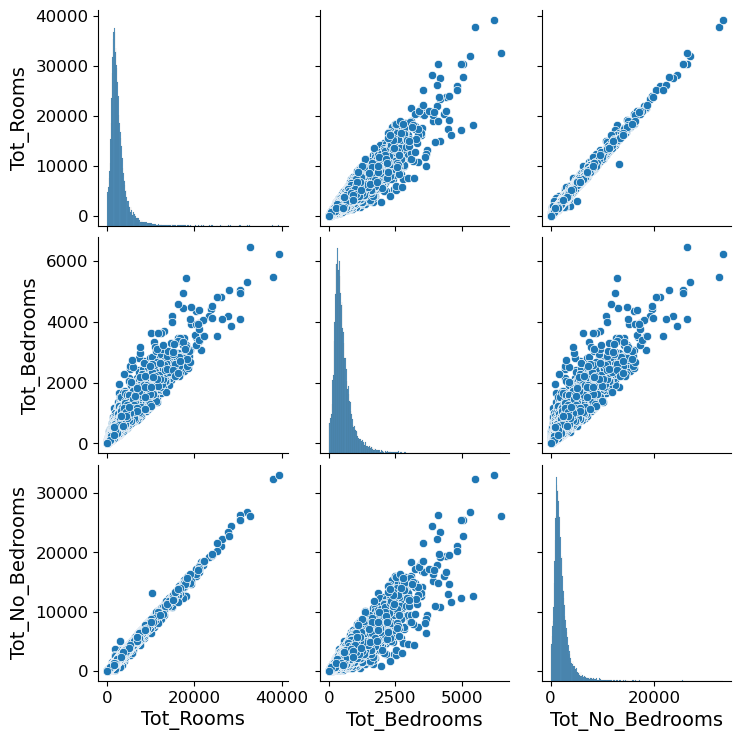

In [8]:
# Exploring the three rooms columns

display(df_mod[["Tot_Rooms", "Tot_Bedrooms", "Tot_No_Bedrooms"]].head())
display(df_mod[["Tot_Rooms", "Tot_Bedrooms", "Tot_No_Bedrooms"]].corr())
sns.pairplot(df_mod[["Tot_Rooms", "Tot_Bedrooms", "Tot_No_Bedrooms"]])

According to above analysis and visualization we see there is multicollinearity problem between all three of the rooms variables. After closely looking at the dataset, we realise that Tot_Rooms is the sum of Tot_Bedrooms and Tot_No_Bedrooms. Checking the following below.

In [9]:
pd.DataFrame(
    (df_mod["Tot_Rooms"] == df_mod["Tot_Bedrooms"] + df_mod["Tot_No_Bedrooms"])
).value_counts()

True     20591
False       47
dtype: int64

47 of the False values are due to the KNN imputation of the missing values done in the previous step. For the rest, our hypothesis about Tot_Rooms being the sum of Tot_Bedrooms and Tot_No_Bedrooms to be True. Multicollinearity could reduce the power of our model to identify independent variables that are statistically significant. Hence, we may drop the one of the columns before performing Machine Learning.

Median_Age  Max_Age
0        41.0     50.0
1        21.0     34.0
2        52.0     66.0
3        52.0     63.0
4        52.0     68.0

Median_Age   Max_Age
Median_Age    1.000000  0.971864
Max_Age       0.971864  1.000000

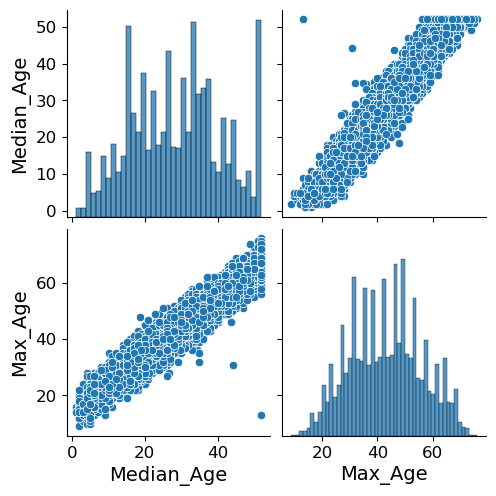

In [10]:
# Exploring the two Age columns

display(df_mod[["Median_Age", "Max_Age"]].head())
display(df_mod[["Median_Age", "Max_Age"]].corr())
sns.pairplot(df_mod[["Median_Age", "Max_Age"]])

There is a same multicollinearity problem between Median Age of a household and Maximum Age in a household columns. This could be an artificially generated columns that we can ignore before performing Machine Learning. 

After finding these two multicollinearity problems, we continue the following analysis.

### Week 3

**Import the \<California_Houses.csv> dataset from your working directory**

**Each row of the dataset represents one district in California**<br>
Have a look a the first and last few rows

In [11]:
df = pd.read_csv("data/California_Houses.csv")

In [12]:
print(
    "                           -------------------------------The first 5 rows-------------------------------"
)
display(df.head())
print(
    "\n\n\n                           -------------------------------The last 5 rows-------------------------------"
)
display(df.tail())

                           -------------------------------The first 5 rows-------------------------------


Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.517001   
1   554279.850069         733236.884360         65049.908574   
2   554610.717069         733525.682937         64867.289833   
3   555194.266086         734095.290744         65287.138412   
4   555194.266086         734095.290744         65287.138412   

   Distance_to_SanFrancisco  
0              21250.213767  
1              20880.600400  
2              18811.487450  
3              18031.047568  
4              18031.047568




                           -------------------------------The last 5 rows-------------------------------


Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
20635   654530.186299         830631.543047        248510.058162   
20636   659747.068444         836245.915229        246849.888948   
20637   654042.214020         830699.573163        240172.220489   
20638   657698.007703         834672.461887        238193.865909   
20639   648723.337126         825569.179028        233282.769063   

       Distance_to_SanFrancisco  
20635             222619.890417  
20636             218314.424634  
20637             212097.936232  
20638             207923.199166  
20639             205473.376575

### Create a categorical  variable \<Closest_city> indicating the closest CA city and drop the distance to each city

*Hint : you may wish to associate the name of each city to the smallest distance among the four cities*

Save the transformed dataset as "housing"

In [13]:
housing = df.copy()
housing.rename(
    columns={
        "Distance_to_LA": "LA",
        "Distance_to_SanDiego": "SanDiego",
        "Distance_to_SanJose": "SanJose",
        "Distance_to_SanFrancisco": "SanFrancisco",
    },
    inplace=True,
)

columns_city = ["LA", "SanDiego", "SanJose", "SanFrancisco"]

housing["Closest_city"] = housing[columns_city].idxmin(axis=1)

housing.drop(columns_city, axis=1, inplace=True)

**Display the summary of your new dataframe**

In [14]:
list(housing.columns)

['Median_House_Value',
 'Median_Income',
 'Median_Age',
 'Tot_Rooms',
 'Tot_Bedrooms',
 'Population',
 'Households',
 'Latitude',
 'Longitude',
 'Distance_to_coast',
 'Closest_city']

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median_House_Value  20640 non-null  float64
 1   Median_Income       20640 non-null  float64
 2   Median_Age          20640 non-null  int64  
 3   Tot_Rooms           20640 non-null  int64  
 4   Tot_Bedrooms        20640 non-null  int64  
 5   Population          20640 non-null  int64  
 6   Households          20640 non-null  int64  
 7   Latitude            20640 non-null  float64
 8   Longitude           20640 non-null  float64
 9   Distance_to_coast   20640 non-null  float64
 10  Closest_city        20640 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.7+ MB


In [16]:
housing.describe()

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  
count       20640.000000  
mean        40509.264883  
std         49140.039160  
min           120.676447  
25%          9079.756762  
50%         20522.019101  
75%         49830.414479  
max        333804.686371

# Part 1 - Data explorations

### What do you notice? 

- which attributes are quantitative ?
- which attributes are not quantitative? and what are their types? 

### *``Your answers here``*

Answer:
- Except Closet_City, all attributes are quantitative. However, Median_Age, Tot_Rooms, Tot_Bedrooms, Population and Households are discrete quantitative variables, and the rest of the quantitative variables are continuous.

- Closest_city is not quantitative, but categorical variable with 4 categories.

### Find out what categories exist in 'Closest_city' column and how many districts belong to each category.


In [17]:
housing["Closest_city"].value_counts()

LA              9823
SanFrancisco    5054
SanJose         3764
SanDiego        1999
Name: Closest_city, dtype: int64

### Show a summary of the quantitative attributes
**Use tables and plots**

In [18]:
df_quant = housing.select_dtypes(exclude="object")

In [19]:
df_quant.describe()

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  
count       20640.000000  
mean        40509.264883  
std         49140.039160  
min           120.676447  
25%          9079.756762  
50%         20522.019101  
75%         49830.414479  
max        333804.686371

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

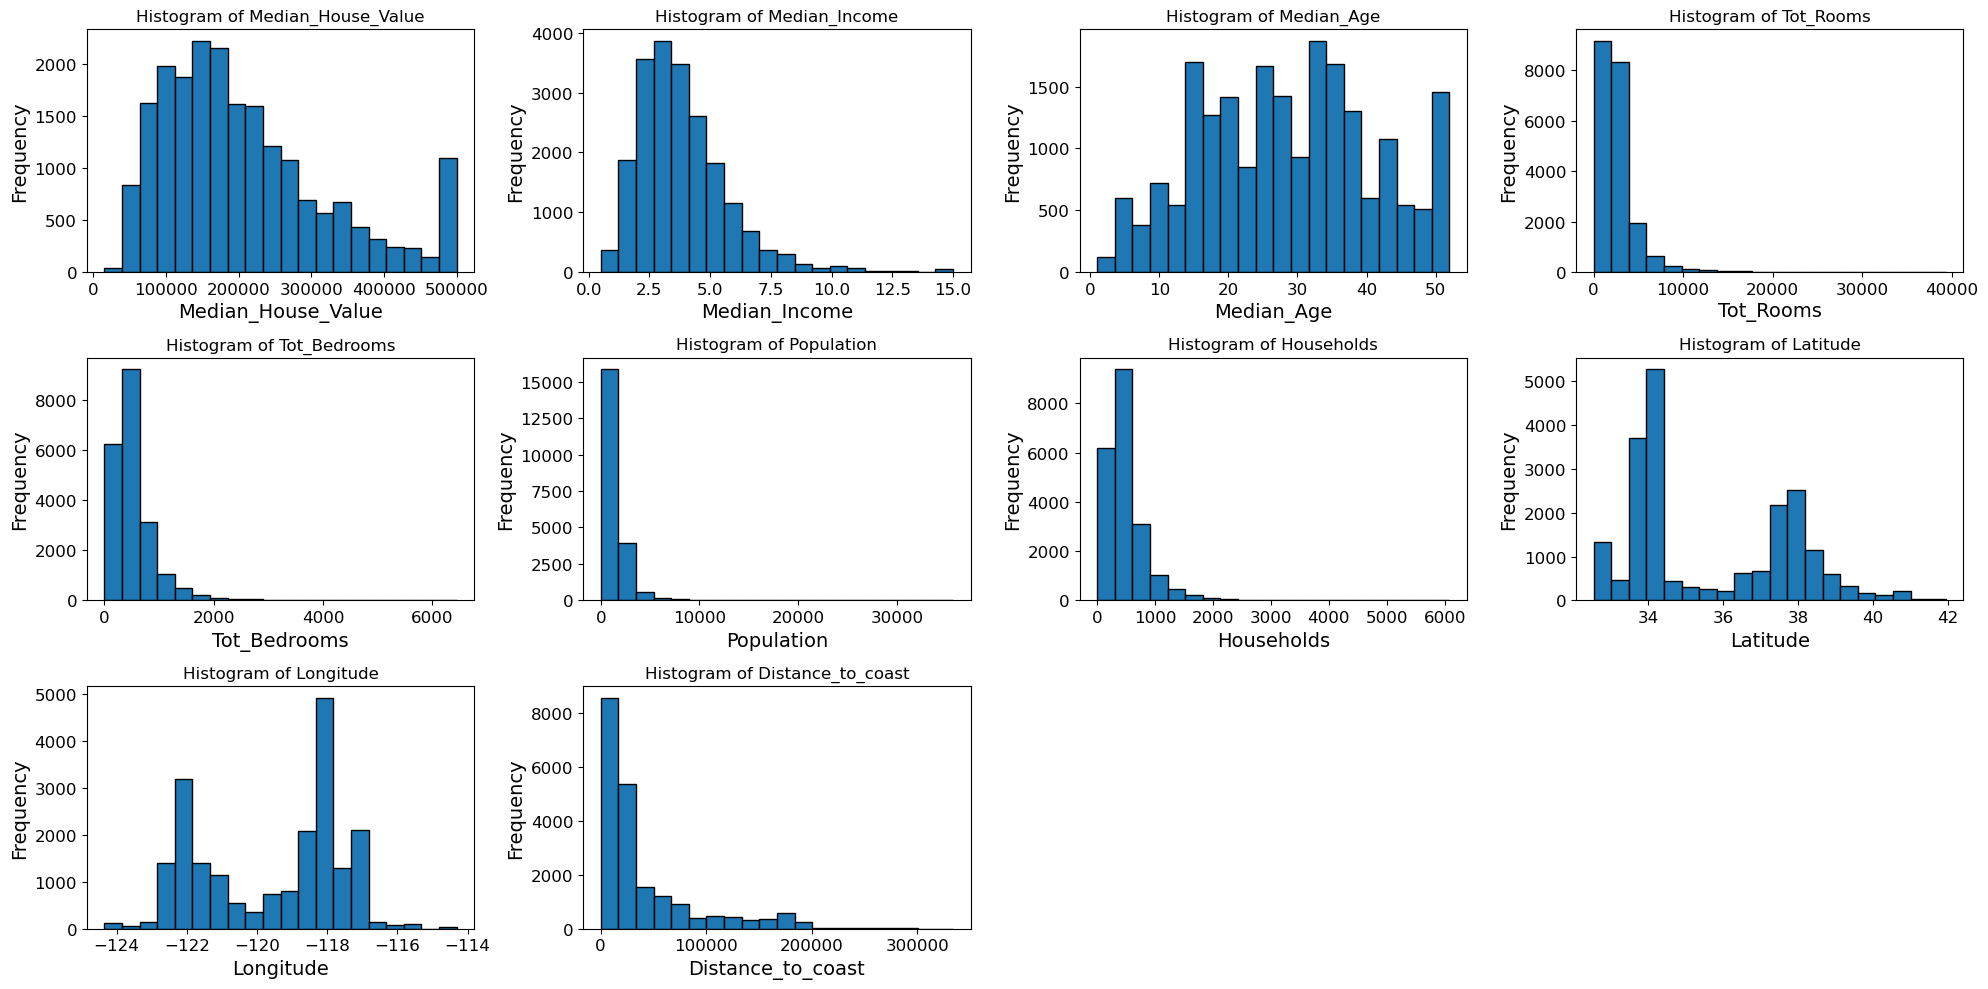

In [21]:
columns_to_plot = [
    "Median_House_Value",
    "Median_Income",
    "Median_Age",
    "Tot_Rooms",
    "Tot_Bedrooms",
    "Population",
    "Households",
    "Latitude",
    "Longitude",
    "Distance_to_coast",
]

fig, axes = plt.subplots(3, 4, figsize=(20, 10))

axes = axes.flatten()

for i, variable in enumerate(columns_to_plot):
    ax = axes[i]
    ax.hist(df_quant[variable], bins=20, edgecolor="k")
    ax.set_xlabel(variable)
    ax.set_ylabel("Frequency")
    ax.set_title(f"Histogram of {variable}")

for i in range(len(columns_to_plot), 12):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [22]:
# Report Observation: There are many values at 500k for Median House Value
# Interpretation: Error during the data collection.
# What to do, linear interpolation?

#### Look more carefully into the distribution of the "median_income" column
Hint : you may wish to change the \<bins> parameter

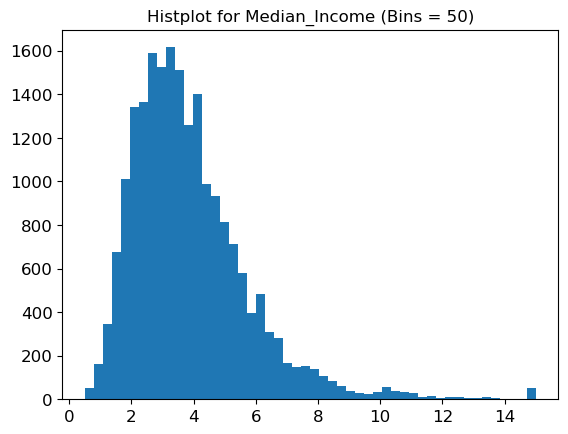

In [23]:
plt.hist(x=housing["Median_Income"], bins=50)
plt.title("Histplot for Median_Income (Bins = 50)")
plt.show()

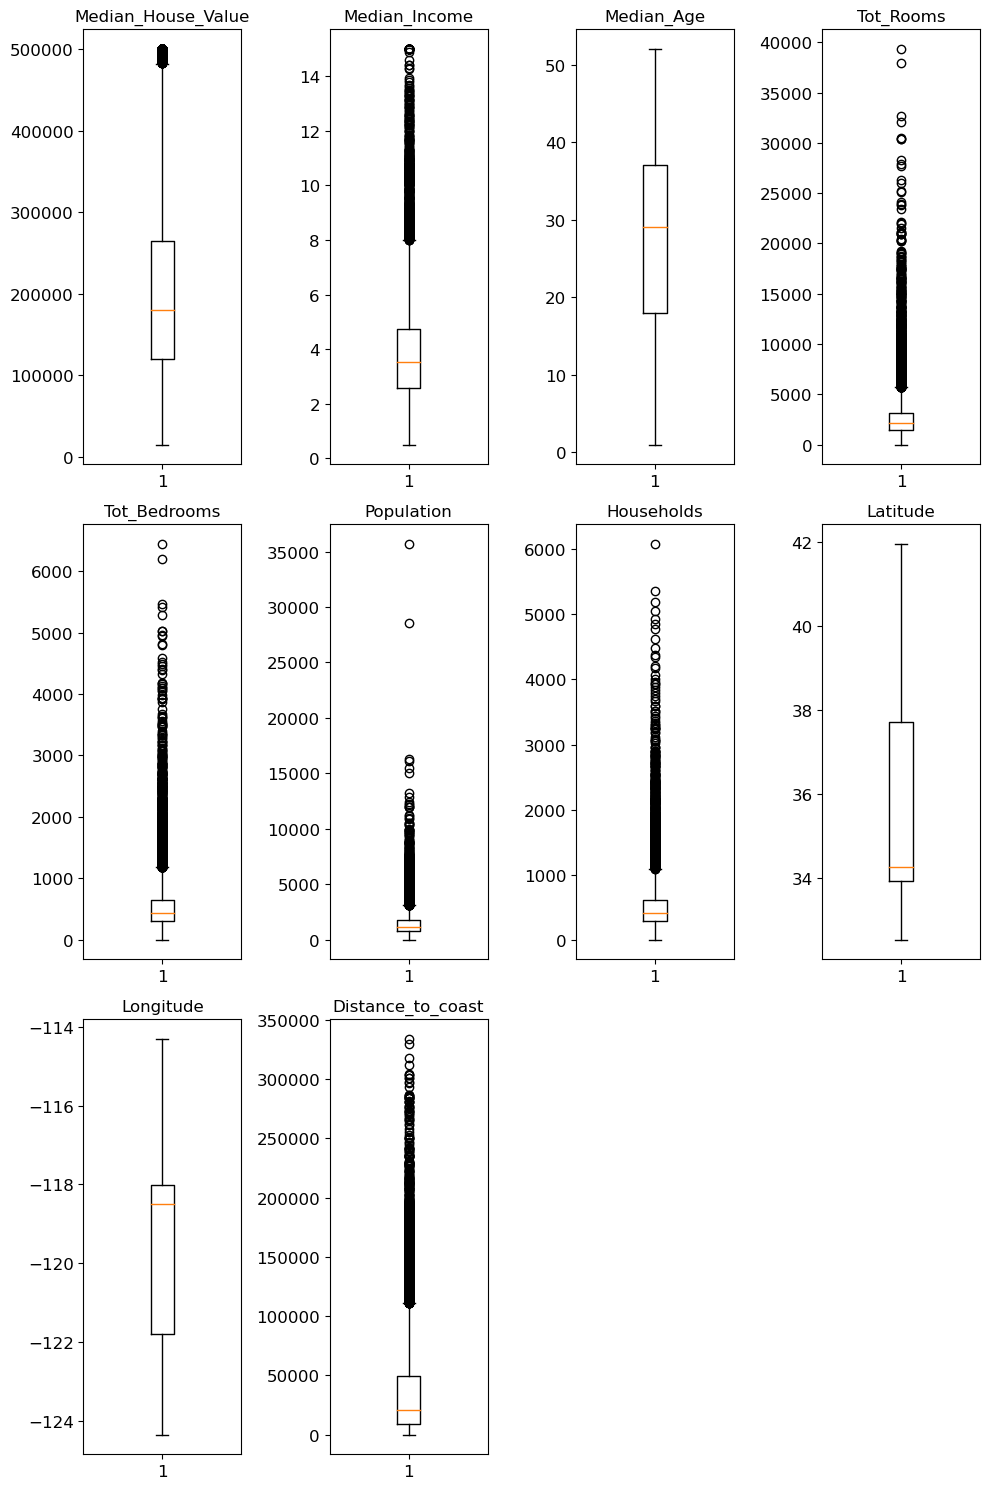

In [24]:
fig, axes = plt.subplots(3, 4, figsize=(10, 15))
axes = axes.flatten()
i = 0

for a in columns_to_plot:
    ax = axes[i]
    ax.boxplot(housing[a])
    ax.set_title(a)
    i += 1

for i in range(len(columns_to_plot), 12):
    # Inside this loop, it deletes (removes) the subplot at index
    # i from the figure fig. This is typically done when you have
    # fewer columns to plot than the total number of subplots in the grid,
    # ensuring that empty subplots are not displayed.
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Explain the following lines of code

### *``Your answers here``*

In [25]:
# Store the min value of the "Median_Income" in the cat list
cat = [np.min(housing["Median_Income"])]

# add 4 quantille (0.20, 0.40, 0.60, 0.80) of the "Median_Income" to cat list
for i in [0.20, 0.40, 0.60, 0.80]:
    cat.append(housing["Median_Income"].quantile(i))

# add the max value of the "Median_Income" to cat list
cat.append(np.max(housing["Median_Income"]))

print(cat)

[0.4999, 2.3523, 3.1406, 3.9669399999999997, 5.10972, 15.0001]


In [26]:
housing["income_cat"] = pd.cut(
    housing["Median_Income"], bins=cat, labels=[1, 2, 3, 4, 5], include_lowest=True
)

In [27]:
housing["income_cat"].value_counts()

2    4131
1    4130
4    4128
5    4128
3    4123
Name: income_cat, dtype: int64

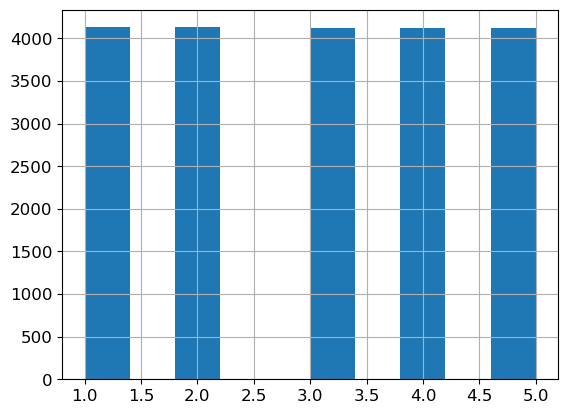

In [28]:
housing["income_cat"].hist();

In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  20640 non-null  float64 
 1   Median_Income       20640 non-null  float64 
 2   Median_Age          20640 non-null  int64   
 3   Tot_Rooms           20640 non-null  int64   
 4   Tot_Bedrooms        20640 non-null  int64   
 5   Population          20640 non-null  int64   
 6   Households          20640 non-null  int64   
 7   Latitude            20640 non-null  float64 
 8   Longitude           20640 non-null  float64 
 9   Distance_to_coast   20640 non-null  float64 
 10  Closest_city        20640 non-null  object  
 11  income_cat          20640 non-null  category
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 1.8+ MB


### Create a Test Set through stratified random sampling on the income variable

**Why a test set ?** <br>
**Why stratify the data on the income variable before generating a test set ?** <br>
Hint : use a seed = 42 for the reproductibility of the (re)samplings

Answer:
- The reason that creating a test set is to evaluate the generalization ability of the finally selected model.
- Stratify the data set can ensure that the samples in the training set and the test set are relatively evenly distributed in each category. Doing so can help improve the generalization ability of the model and reduce bias problems caused by uneven sample distribution.

#From chatgpt for our discussion: 

Stratified Random Sampling:

Stratified random sampling is typically performed when you have imbalanced class distributions in your target variable.

It's usually done at the beginning of your data preprocessing pipeline, before any other data transformations, to ensure that you have a representative sample of all classes in both your training and testing datasets.

Stratified sampling helps prevent issues like having all instances of a minority class in the test set, which can lead to biased model evaluation.

### *``Your answers here``*

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_strat, test_strat = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42
)

Now generate an equivalent random split without stratification

In [32]:
train_random, test_random = train_test_split(housing, test_size=0.2, random_state=42)

#### Explain precisely what each of the two following cells do.

### *``Your answers here``*

In [33]:
# This function calculate the proportions of different income categories in the dataframe data
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)


# Split the dataframe housing to a test set (20%) and train set (80%) without stratification and a randomstate of 42
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Create a dataframe with three columns, and each of them represents the proportion of different income categories in the test_strat, test_random, and housing (full dataframe)
compare_props = pd.DataFrame(
    {
        "Overall": income_cat_proportions(housing),
        "Stratified": income_cat_proportions(test_strat),
        "Random": income_cat_proportions(test_random),
    }
).sort_index()


# Add a column of the percentage error in income category proportions between the "Stratified" subset and the "Overall" dataset
compare_props["Strat. %error"] = (
    100 * compare_props["Stratified"] / compare_props["Overall"] - 100
)
# Add a column of the percentage error in income category proportions between the "Random" subset and the "Overall" dataset
compare_props["Rand. %error"] = (
    100 * compare_props["Random"] / compare_props["Overall"] - 100
)

In [34]:
display(compare_props)
print(
    "This part should explain the strattfied sampling could avoid sampling bias and better represent the population, compared to random split without stratification."
)

Overall  Stratified    Random  Strat. %error  Rand. %error
1  0.200097    0.200097  0.202762  -1.421085e-14      1.331719
2  0.200145    0.200097  0.203973  -2.420721e-02      1.912370
3  0.199758    0.199612  0.205184  -7.276255e-02      2.716469
4  0.200000    0.200097  0.198886   4.844961e-02     -0.557171
5  0.200000    0.200097  0.189196   4.844961e-02     -5.402132

This part should explain the strattfied sampling could avoid sampling bias and better represent the population, compared to random split without stratification.


**For safety, copy the stratified train set to be used for modeling** <br>
Call your working copy \<houses_df>

In [35]:
houses_df = train_strat.copy()
# To be used later, for the next section we will stick to housing and df_quant

### Data Visualization : scatter plots

**Plot each row (observation) in the dataset as a geographical point** <br>
Hint : You may use figsize=(10,10), alpha=0.2)

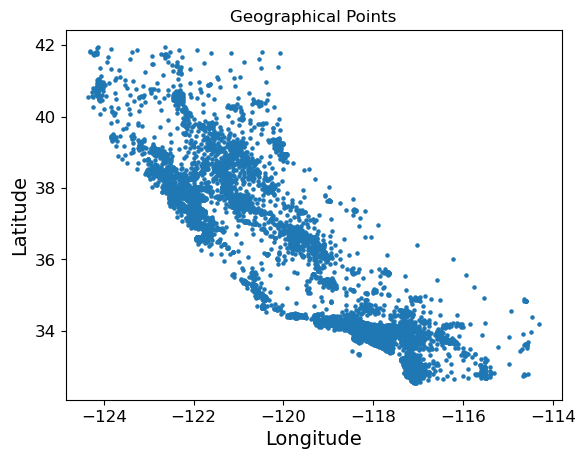

In [36]:
latitude = housing["Latitude"]
longitude = housing["Longitude"]

plt.scatter(longitude, latitude, s=5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Points")

plt.show()

### Geographic map of California houses values per district with population density

**Try to understand and comment on the following code**

### *``Your comments here``*

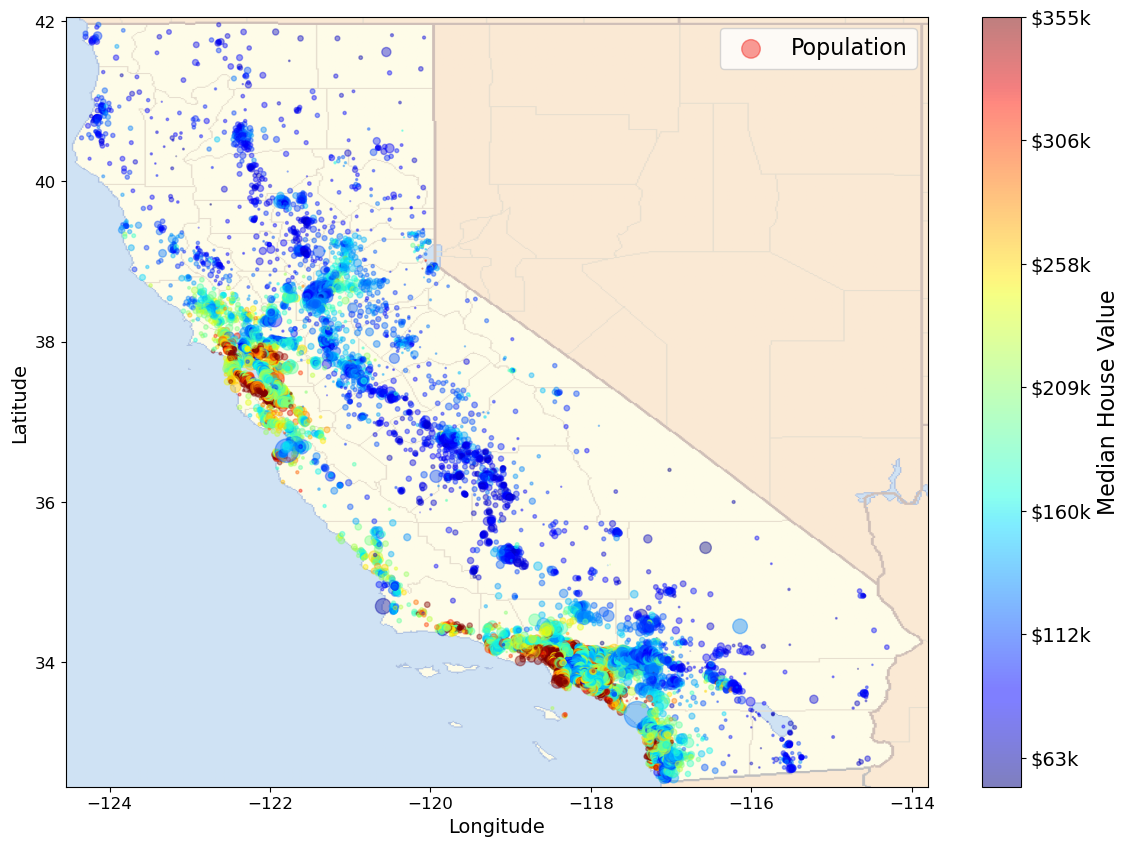

In [37]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.image as mpimg

california_img = mpimg.imread(r"california.png")

"""
The x-axis and y-axis represent the longitude and latitude repectively, so all the disticts are located on map geographicaly.
The diameter of the scatter points represents the population.
The color represents the median house price in thousand dollars.
"""

ax = housing.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    figsize=(14, 10),
    s=housing["Population"] / 100,
    label="Population",
    c="Median_House_Value",
    cmap=plt.get_cmap("jet"),
    colorbar=False,
    alpha=0.4,
)
plt.imshow(
    california_img,
    extent=[-124.55, -113.80, 32.45, 42.05],
    alpha=0.5,
    cmap=plt.get_cmap("jet"),
)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["Median_House_Value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk" % (round(v / 1000)) for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Bivariate Analysis

**How are the different variables related to each other two by two ?**

Compute the correlation matrix of all the quantitative variables <br>
Call it "houses_cor"

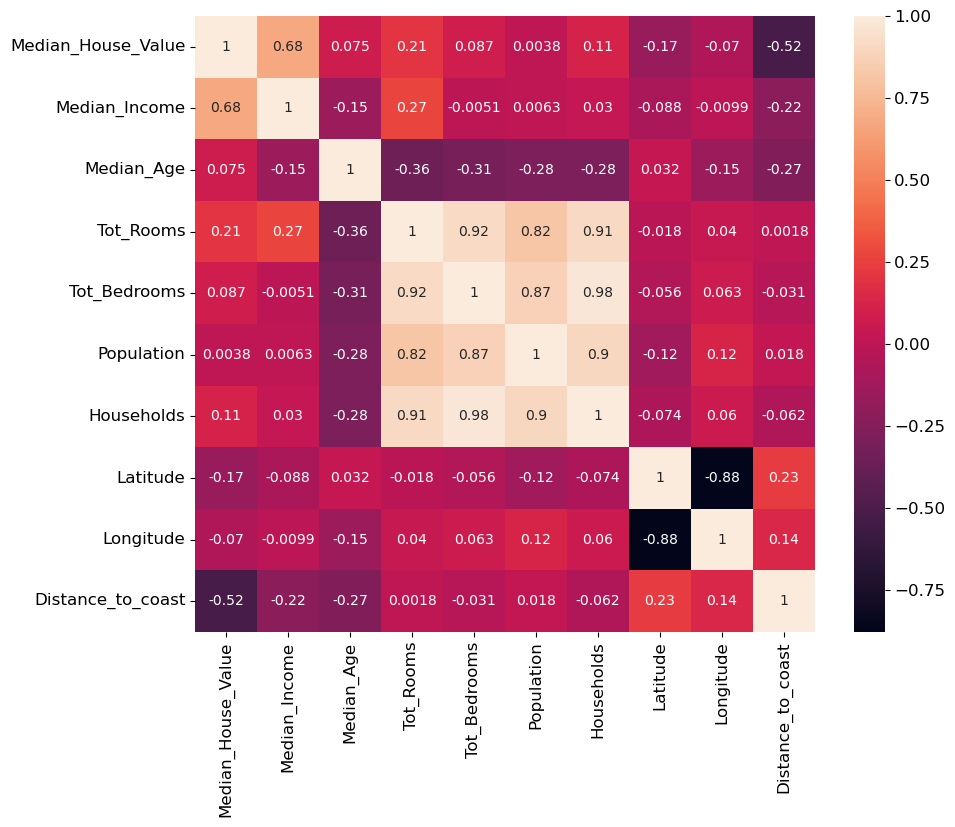

In [38]:
plt.figure(figsize=(10, 8))
houses_cor = sns.heatmap(df_quant.corr(method="spearman"), annot=True)
plt.show()

Display the most important correlations with the target variable : \<Median_House_Value> <br>
Why is it pertinent to choose this variable as outcome (target) ?

In [39]:
correlation_matrix = df_quant.corr(method="spearman")
target_correlations = correlation_matrix["Median_House_Value"].sort_values(
    ascending=False
)
significant_correlations = target_correlations[abs(target_correlations) > 0.3]

print(significant_correlations)

print(
    "The most important correlations with the Median_House_Value are Median_Income, Distance_to_coast."
)

Median_House_Value    1.000000
Median_Income         0.676778
Distance_to_coast    -0.520732
Name: Median_House_Value, dtype: float64
The most important correlations with the Median_House_Value are Median_Income, Distance_to_coast.


### *``Your comments here``*

What are the predictors of \<Median_House_Value> worthy of interest and the nature of their relationship with the target ? <br>
**Provide the scatter plots of those predictors with the target**

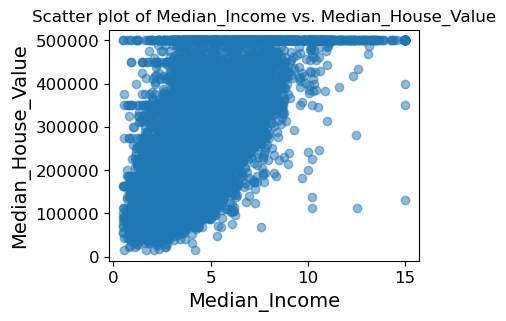

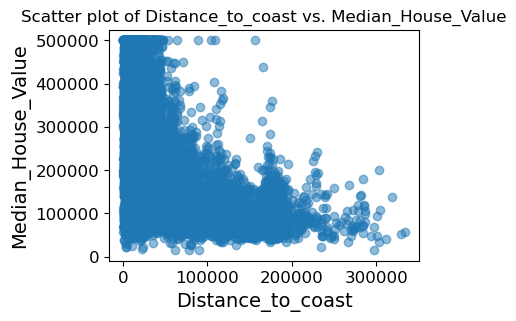

In [40]:
corr_matrix = df_quant.corr(method="spearman")
correlations = target_correlations[abs(corr_matrix["Median_House_Value"]) > 0.3]

for feature in correlations.index:
    if feature != "Median_House_Value":  # Exclude the target variable itself
        plt.figure(figsize=(4, 3))
        plt.scatter(
            df_quant[feature],
            df_quant["Median_House_Value"],
            alpha=0.5,
        )
        plt.title(f"Scatter plot of {feature} vs. Median_House_Value")
        plt.xlabel(feature)
        plt.ylabel("Median_House_Value")
        plt.show()

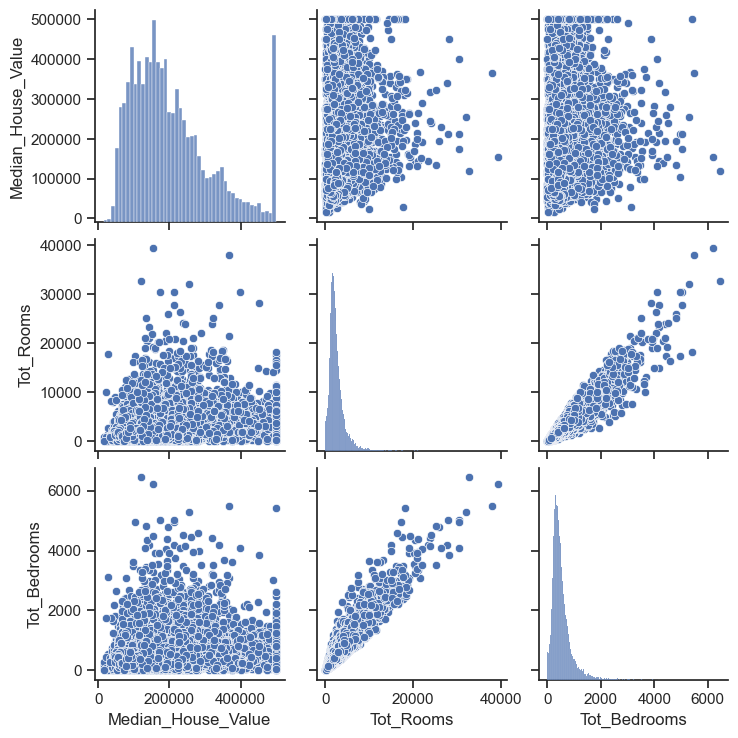

In [41]:
sns.set_theme(style="ticks")
sns.pairplot(housing[["Median_House_Value", "Tot_Rooms", "Tot_Bedrooms"]])

### *``Your answers here``*

**What special observations are you drawing from these scatter plots?** <br>
Is the total number of rooms or bedrooms per district meaningful ? <br>
If so explain why, if not what are your suggestions ?

**Create three new variables :**
1. Rooms per household
2. Bedrooms per rooms
3. People per household

In [42]:
housing["Rooms_per_household"] = housing["Tot_Rooms"] / housing["Households"]
housing["Bedrooms_per_rooms"] = housing["Tot_Bedrooms"] / housing["Tot_Rooms"]
housing["People_per_household"] = housing["Population"] / housing["Households"]
df_quant = housing.select_dtypes(exclude="object")

**Let us again look at the correlation between the predictors and the target**

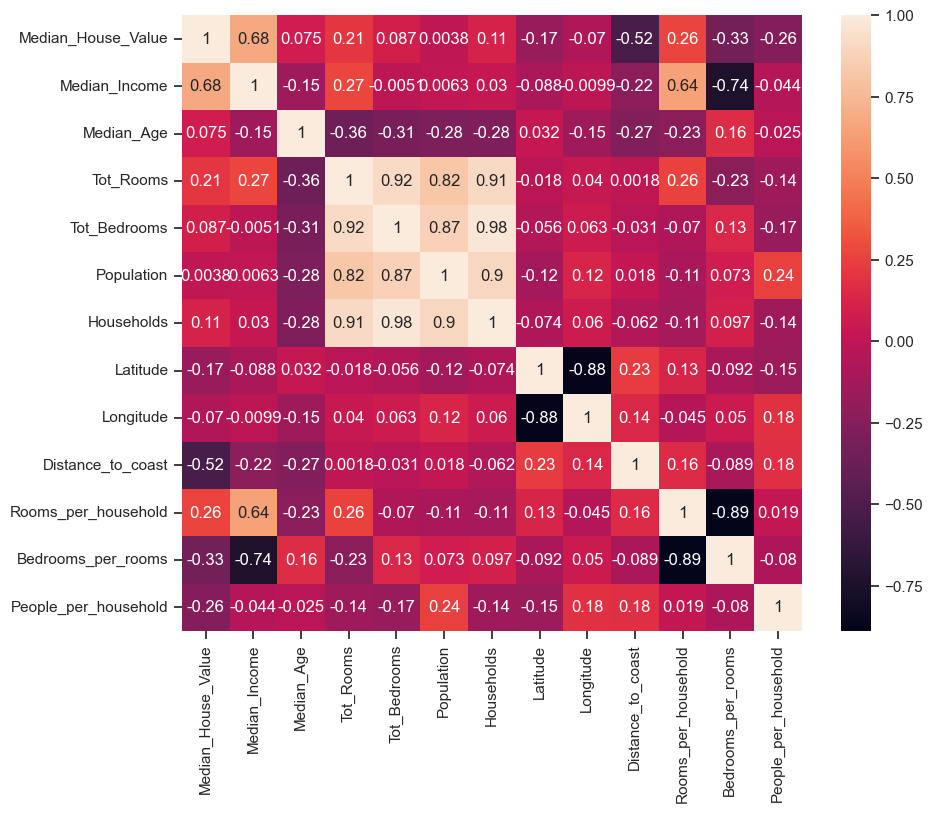

In [43]:
plt.figure(figsize=(10, 8))
houses_cor = sns.heatmap(df_quant.corr(method="spearman"), annot=True)
plt.show()

In [44]:
correlation_matrix = df_quant.corr(method="spearman")
target_correlations = correlation_matrix["Median_House_Value"].sort_values(
    ascending=False
)
significant_correlations = target_correlations[abs(target_correlations) > 0.3]

print(significant_correlations)

print(
    "Besides Median_Income, Distance_to_coast，Bedrooms_per_rooms and People_per_household are also have important correlations with the Median_House_Value."
)

Median_House_Value    1.000000
Median_Income         0.676778
Bedrooms_per_rooms   -0.331291
Distance_to_coast    -0.520732
Name: Median_House_Value, dtype: float64
Besides Median_Income, Distance_to_coast，Bedrooms_per_rooms and People_per_household are also have important correlations with the Median_House_Value.


# Part 2 - Preparing data for Machine Learning

## 2.1 - Missing Values

### 2.1.1 - Case when there are missing values in one variable

Let us create a dataset where there are 10% of missing values in one variable

*``Comment on each of the following cells``*

In [45]:
# Crearting a random array of 1651 value with a seed of 42

import random

random.seed(42)
miss = np.random.choice(houses_df.index, 1651)

In [46]:
miss

array([19624, 15938, 17477, ..., 11819, 13609,  5299], dtype=int64)

In [47]:
# We copy the stratified train set

houses_miss = houses_df.copy()

In [48]:
# Assign None value to the "Tot_Bedrooms" column for the rows corresponding to the indices stored in the miss array

houses_miss.loc[miss, "Tot_Bedrooms"] = None

In [49]:
# display the infos of the new dataset with missing values

display(houses_miss.info())
display(houses_miss.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  int64   
 3   Tot_Rooms           16512 non-null  int64   
 4   Tot_Bedrooms        14950 non-null  float64 
 5   Population          16512 non-null  int64   
 6   Households          16512 non-null  int64   
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_city        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(6), int64(4), object(1)
memory usage: 2.0+ MB


None

Median_House_Value       0
Median_Income            0
Median_Age               0
Tot_Rooms                0
Tot_Bedrooms          1562
Population               0
Households               0
Latitude                 0
Longitude                0
Distance_to_coast        0
Closest_city             0
income_cat               0
dtype: int64

**When we have missing values, there are two main possibilities :**
1. We simply drop the rows associated to the missing values
2. We estimate the missing values through an imputation method - the simplest and safest is to use the median

In [50]:
# drop all missing values of the Tot_Bedrooms column the house_miss dataframe

houses_drop = houses_miss.dropna(subset=["Tot_Bedrooms"])

In [51]:
# display the infos of the new dataset after removing missing values

display(houses_drop.info())
display(houses_drop.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14950 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  14950 non-null  float64 
 1   Median_Income       14950 non-null  float64 
 2   Median_Age          14950 non-null  int64   
 3   Tot_Rooms           14950 non-null  int64   
 4   Tot_Bedrooms        14950 non-null  float64 
 5   Population          14950 non-null  int64   
 6   Households          14950 non-null  int64   
 7   Latitude            14950 non-null  float64 
 8   Longitude           14950 non-null  float64 
 9   Distance_to_coast   14950 non-null  float64 
 10  Closest_city        14950 non-null  object  
 11  income_cat          14950 non-null  category
dtypes: category(1), float64(6), int64(4), object(1)
memory usage: 1.4+ MB


None

Median_House_Value    0
Median_Income         0
Median_Age            0
Tot_Rooms             0
Tot_Bedrooms          0
Population            0
Households            0
Latitude              0
Longitude             0
Distance_to_coast     0
Closest_city          0
income_cat            0
dtype: int64

In [52]:
# fill all missing values of Tot_Bedrooms column by the median
Bed_med = houses_miss["Tot_Bedrooms"].median()
houses_miss["Tot_Bedrooms"].fillna(Bed_med, inplace=True)

In [53]:
## Your comment here ##

houses_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  int64   
 3   Tot_Rooms           16512 non-null  int64   
 4   Tot_Bedrooms        16512 non-null  float64 
 5   Population          16512 non-null  int64   
 6   Households          16512 non-null  int64   
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_city        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(6), int64(4), object(1)
memory usage: 2.0+ MB


### 2.1.2 - Case where you have missing values in several variables

Let us now build a dataset with multiple missing values : <br>
Start with a function generating missing values in a chosen column of a dataframe

In [54]:
def col_miss(df, col, max_miss):
    random.seed(42)
    miss = np.random.choice(df.index, max_miss)
    df_copy = df.copy()
    df_copy.loc[miss, col] = None
    return df_copy

In [55]:
# Copy the train set
housing_miss = houses_df.copy()
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  int64   
 3   Tot_Rooms           16512 non-null  int64   
 4   Tot_Bedrooms        16512 non-null  int64   
 5   Population          16512 non-null  int64   
 6   Households          16512 non-null  int64   
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_city        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 2.0+ MB


Generate some missing values in the first 10 predictors of \<housing_miss>

In [56]:
for i in range(1, 10):
    housing_miss = col_miss(housing_miss, housing_miss.columns[i], 100)

In [57]:
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16413 non-null  float64 
 2   Median_Age          16413 non-null  float64 
 3   Tot_Rooms           16413 non-null  float64 
 4   Tot_Bedrooms        16412 non-null  float64 
 5   Population          16412 non-null  float64 
 6   Households          16412 non-null  float64 
 7   Latitude            16412 non-null  float64 
 8   Longitude           16412 non-null  float64 
 9   Distance_to_coast   16412 non-null  float64 
 10  Closest_city        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(10), object(1)
memory usage: 2.0+ MB


Now, he have a dataset with missing values in all the quantitative predictors

#### How many missing values are there in each variable ?

In [58]:
# There are 100/99 missing value
housing_miss.isnull().sum()

Median_House_Value      0
Median_Income          99
Median_Age             99
Tot_Rooms              99
Tot_Bedrooms          100
Population            100
Households            100
Latitude              100
Longitude             100
Distance_to_coast     100
Closest_city            0
income_cat              0
dtype: int64

#### Let us use sklearn to do multiple imputation, with existing modules

In [59]:
# Start with simple imputer
from sklearn.impute import SimpleImputer

**Using Simple Imputer, impute missing data in each variable by replacing missing values with the mean**

In [60]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(housing_miss.select_dtypes(exclude="object"))
X = imputer.transform(housing_miss.select_dtypes(exclude="object"))

In [61]:
X_df = pd.DataFrame(X, columns=housing_miss.select_dtypes(exclude="object").columns)
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median_House_Value  16512 non-null  float64
 1   Median_Income       16512 non-null  float64
 2   Median_Age          16512 non-null  float64
 3   Tot_Rooms           16512 non-null  float64
 4   Tot_Bedrooms        16512 non-null  float64
 5   Population          16512 non-null  float64
 6   Households          16512 non-null  float64
 7   Latitude            16512 non-null  float64
 8   Longitude           16512 non-null  float64
 9   Distance_to_coast   16512 non-null  float64
 10  income_cat          16512 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


**Using KNNImputer, impute missing data in each variable**

In [62]:
from sklearn.impute import KNNImputer

In [63]:
# The creation of the knn ilputer with K=4
knn_imputer = KNNImputer(n_neighbors=4)

In [64]:
# Fit and transform the DataFrame to impute missing values
df_knn = knn_imputer.fit_transform(housing_miss.select_dtypes(exclude="object"))

In [65]:
df_knn = pd.DataFrame(
    df_knn, columns=housing_miss.select_dtypes(exclude="object").columns
)
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median_House_Value  16512 non-null  float64
 1   Median_Income       16512 non-null  float64
 2   Median_Age          16512 non-null  float64
 3   Tot_Rooms           16512 non-null  float64
 4   Tot_Bedrooms        16512 non-null  float64
 5   Population          16512 non-null  float64
 6   Households          16512 non-null  float64
 7   Latitude            16512 non-null  float64
 8   Longitude           16512 non-null  float64
 9   Distance_to_coast   16512 non-null  float64
 10  income_cat          16512 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


### Which imputer is better : SimpleImputer or KNNImputer ?
Please give some arguments

In [66]:
def compare_df(df, df_impute):
    """To compare the mean squared error between two dataframes"""
    from sklearn.metrics import mean_squared_error as mse

    reg_error = []
    for col in df.columns:
        reg_error.append(mse(df[col], df_impute[col]))
    return reg_error

In [67]:
# comparing the error after simple imputation and knn imputation of missing values

simple_imp = np.mean(compare_df(houses_df.select_dtypes(exclude="object"), X_df))
knn_imp = np.mean(compare_df(houses_df.select_dtypes(exclude="object"), df_knn))

print(
    f"Error after simple imputation {simple_imp: .4f}, \nError after knn imputation {knn_imp: .4f}"
)

Error after simple imputation  1290904.3033, 
Error after knn imputation  827958.3096


 *``Your answers here``*

Clearly, the mean of mean squared error for all the columns is greater in the case if simple imputation. Hence, KNN imputation is better in this case. 

## 2.2 - Categorical variables...

In [68]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    20640 non-null  float64 
 1   Median_Income         20640 non-null  float64 
 2   Median_Age            20640 non-null  int64   
 3   Tot_Rooms             20640 non-null  int64   
 4   Tot_Bedrooms          20640 non-null  int64   
 5   Population            20640 non-null  int64   
 6   Households            20640 non-null  int64   
 7   Latitude              20640 non-null  float64 
 8   Longitude             20640 non-null  float64 
 9   Distance_to_coast     20640 non-null  float64 
 10  Closest_city          20640 non-null  object  
 11  income_cat            20640 non-null  category
 12  Rooms_per_household   20640 non-null  float64 
 13  Bedrooms_per_rooms    20640 non-null  float64 
 14  People_per_household  20640 non-null  float64 
dtypes:

We have two categorical variables :
1. "Closest_city" is nominal
2. "income_cat" is ordinal
**Explain the difference between nominal and ordinal variables**

`The difference is that nominal could not be ordered but ordinal could have an order

### 2.2.1 - Introducing onehot encoding

"Closest_city" has four modalities : the four city names <br>
"income_cat" has five modalities : the five intervals that we have labeled 1,2,3,4,5. However as you see in the graph and in the original values - cat =  [0.4999, 2.3523, 3.1406, 3.9669399999999997, 5.10972, 15.0001] these intervals are not equidistant, so you cannot really add nor substract them meaningfully. <br>
**In short, Closet_city is nominal categorical variable, Income_cat is ordinal categorical variable.**

*So, what is one hot encoding ?*

1. Count the number of modalities in your categorical variable - assume we have k modalities
2. Create k  dummy variables with k modalities where the values are 1 for the corresponding modalities, otherwise 0 <br>
*Warning : this method is forbidden for analytical solutions and with Linear Regression without regularization. <br>
For more information : [see here](https://inmachineswetrust.com/posts/drop-first-columns/#cell7)*

In [69]:
# Let us select our categorical variables
houses_cat = housing[["Closest_city", "income_cat"]]

In [70]:
# Call for onehot encoder. Choose a dense rather than a sparse vector
from sklearn.preprocessing import OneHotEncoder as OHE

onehot = OHE(sparse=False)

In [71]:
houses_onehot = pd.DataFrame(onehot.fit_transform(houses_cat))
houses_onehot.columns = onehot.get_feature_names_out()

In [72]:
houses_onehot.head()

Closest_city_LA  Closest_city_SanDiego  Closest_city_SanFrancisco  \
0              0.0                    0.0                        1.0   
1              0.0                    0.0                        1.0   
2              0.0                    0.0                        1.0   
3              0.0                    0.0                        1.0   
4              0.0                    0.0                        1.0   

   Closest_city_SanJose  income_cat_1  income_cat_2  income_cat_3  \
0                   0.0           0.0           0.0           0.0   
1                   0.0           0.0           0.0           0.0   
2                   0.0           0.0           0.0           0.0   
3                   0.0           0.0           0.0           0.0   
4                   0.0           0.0           0.0           1.0   

   income_cat_4  income_cat_5  
0           0.0           1.0  
1           0.0           1.0  
2           0.0           1.0  
3           0.0           1.0  
4           0.0           0.0

In [73]:
houses_OHE = pd.concat([df_quant, houses_onehot], axis=1)
houses_OHE.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  ...  \
0         322         126     37.88    -122.23        9263.040773  ...   
1        2401        1138     37.86    -122.22       10225.733072  ...   
2         496         177     37.85    -122.24        8259.085109  ...   
3         558         219     37.85    -122.25        7768.086571  ...   
4         565         259     37.85    -122.25        7768.086571  ...   

  People_per_household  Closest_city_LA  Closest_city_SanDiego  \
0             2.555556              0.0                    0.0   
1             2.109842              0.0                    0.0   
2             2.802260              0.0                    0.0   
3             2.547945              0.0                    0.0   
4             2.181467              0.0                    0.0   

   Closest_city_SanFrancisco  Closest_city_SanJose  income_cat_1  \
0                        1.0                   0.0           0.0   
1                        1.0                   0.0           0.0   
2                        1.0                   0.0           0.0   
3                        1.0                   0.0           0.0   
4                        1.0                   0.0           0.0   

   income_cat_2  income_cat_3  income_cat_4  income_cat_5  
0           0.0           0.0           0.0           1.0  
1           0.0           0.0           0.0           1.0  
2           0.0           0.0           0.0           1.0  
3           0.0           0.0           0.0           1.0  
4           0.0           1.0           0.0           0.0  

[5 rows x 23 columns]

### 2.2.2 - Building a Pipeline

Let us first discover how a pipeline operates...

In [74]:
# Copy once again the original train set
housing_df = train_strat.copy()
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  int64   
 3   Tot_Rooms           16512 non-null  int64   
 4   Tot_Bedrooms        16512 non-null  int64   
 5   Population          16512 non-null  int64   
 6   Households          16512 non-null  int64   
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_city        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 2.0+ MB


Let us start with a custom transformer to be used to add attributes

In [75]:
# BaseEstimator is a base class in the scikit-learn machine learning library that defines the basic interface for all estimators in scikit-learn
# TransformerMixin is an interface in Scikit-Learn that provides two methods for creating custom data transforms: fit and transform


from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # np.c_ concatenates arrays along the second axis
            return np.c_[
                X, rooms_per_household, population_per_household, bedrooms_per_room
            ]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [76]:
attr_adder = CombinedAttributesAdder(
    add_bedrooms_per_room=False
)  # bedrooms_per_room is not to be added for this code
houses_plus = attr_adder.transform(housing_df.values)

In [77]:
houses_plus  # An array of new columns with values from housing_df using the column indices defined in the previous code block

array([[182000.0, 3.9816, 10, ..., 4, 4.735235567352356,
        1.9635036496350364],
       [355300.0, 7.2707, 8, ..., 5, 6.771929824561403,
        3.9451754385964914],
       [87700.0, 3.6895, 29, ..., 3, 5.475, 2.5954545454545452],
       ...,
       [65000.0, 2.75, 28, ..., 2, 5.342233009708738, 3.6990291262135924],
       [292900.0, 7.2779, 16, ..., 5, 5.351851851851852,
        2.1064814814814814],
       [457300.0, 5.4088, 39, ..., 5, 6.543165467625899,
        2.7697841726618706]], dtype=object)

#### What do these codes actually accomplish ?
Hint : sklearn uses duck typing, not inheritance.<br>
To find our more about Duck Typing, [go here](https://youtu.be/N6sst3aH_FA)

*``This code creates a new class that inherits from BaseEstimator and TransformerMixin and creates a method that takes as parametre DataFrame and returns new specified features rooms_per_household, population_per_household and in case we want to have bedrooms_per_room the DataFrame``*

In [78]:
# Check your answers...

houses_plus_df = pd.DataFrame(
    houses_plus,
    columns=list(housing_df.columns)
    + ["rooms_per_household", "population_per_household"],
    index=housing_df.index,
)

houses_plus_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Median_House_Value        16512 non-null  object
 1   Median_Income             16512 non-null  object
 2   Median_Age                16512 non-null  object
 3   Tot_Rooms                 16512 non-null  object
 4   Tot_Bedrooms              16512 non-null  object
 5   Population                16512 non-null  object
 6   Households                16512 non-null  object
 7   Latitude                  16512 non-null  object
 8   Longitude                 16512 non-null  object
 9   Distance_to_coast         16512 non-null  object
 10  Closest_city              16512 non-null  object
 11  income_cat                16512 non-null  object
 12  rooms_per_household       16512 non-null  object
 13  population_per_household  16512 non-null  object
dtypes: object(14)
memory

2 new columns rooms_per_household and population_per_household are created in our train dataset

### 2.2.3 - Pipeline for the quantitative variables

For the quantitative variables, let us generate a pipeline with the following steps
1. Impute missing values with the "median" method
2. Add two new attributes : rooms per household and population per household
3. Standardize the training set

#### Let us restart with a new training set from a dataset with missing values

In [79]:
train = housing_miss[housing_miss.columns[0:12]]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16413 non-null  float64 
 2   Median_Age          16413 non-null  float64 
 3   Tot_Rooms           16413 non-null  float64 
 4   Tot_Bedrooms        16412 non-null  float64 
 5   Population          16412 non-null  float64 
 6   Households          16412 non-null  float64 
 7   Latitude            16412 non-null  float64 
 8   Longitude           16412 non-null  float64 
 9   Distance_to_coast   16412 non-null  float64 
 10  Closest_city        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(10), object(1)
memory usage: 2.0+ MB


In [80]:
quanti_features = list(train.columns[0:10])
cat_features = ["Closest_city", "income_cat"]
train_quanti = train[quanti_features]

In [81]:
train_quanti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1405 to 4028
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median_House_Value  16512 non-null  float64
 1   Median_Income       16413 non-null  float64
 2   Median_Age          16413 non-null  float64
 3   Tot_Rooms           16413 non-null  float64
 4   Tot_Bedrooms        16412 non-null  float64
 5   Population          16412 non-null  float64
 6   Households          16412 non-null  float64
 7   Latitude            16412 non-null  float64
 8   Longitude           16412 non-null  float64
 9   Distance_to_coast   16412 non-null  float64
dtypes: float64(10)
memory usage: 1.9 MB


**Define the pipeline which will go through three steps :**
1. Impute missing data with the median method
2. Combine three new attributes
3. Standardize the quantitative features

In [82]:
# The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

quanti_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("attribs_adder", CombinedAttributesAdder()),  # this will add 3 attributes
        ("std_scaler", StandardScaler()),
    ]
)

houses_quanti = quanti_pipeline.fit_transform(train_quanti)

Median imputed, added new columns as well as standardized the train_quanti dataset using Pipeline

In [83]:
houses_quanti

array([[-0.21500961,  0.062339  , -1.48876523, ..., -0.26706602,
        -0.09888893,  0.12245159],
       [ 1.28751484,  1.81111997, -1.64819665, ...,  0.49286374,
         0.07380079, -0.34068234],
       [-1.03259793, -0.0929676 ,  0.02583326, ...,  0.0089543 ,
        -0.04381855, -0.18815095],
       ...,
       [-1.22940869, -0.59249018, -0.05388245, ..., -0.04058361,
         0.05235075, -0.1108967 ],
       [ 0.746502  ,  1.81494814, -1.01047097, ..., -0.03699464,
        -0.08642935, -0.24201406],
       [ 2.17186276,  0.8211667 ,  0.82299036, ...,  0.40750736,
        -0.02862686, -0.30472471]])

#### Explain the previous cells of codes and what they aim to accomplish

*``↓ Comment ↓``*

In the first cell we create a Pipeline to organize a sequence of three steps into a single object :  Fill missing values in the data / Add 3 attributes / Standarizing quantitative data

*``↑ Comment ↑``*

**How many features should we have at this step ?** 

In [84]:
len(houses_quanti[0])

13

In [85]:
houses_quanti_df = pd.DataFrame(
    houses_quanti,
    columns=list(train_quanti.columns)
    + ["rooms_per_household", "population_per_household", "bedrooms_per_room"],
    index=housing_df.index,
)

houses_quanti_df.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
1405            -0.215010       0.062339   -1.488765   2.089937      2.763865   
17718            1.287515       1.811120   -1.648197   0.212516     -0.150166   
19928           -1.032598      -0.092968    0.025833  -0.102397     -0.241155   
13782           -0.886074      -1.310644   -0.053882   0.175877      0.386188   
18138            1.254569       0.715892    0.185265   0.331247      0.199422   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
1405     1.366089    2.658228  1.091262  -1.240337          -0.616043   
17718    0.335176   -0.113171  0.795841  -1.095542          -0.183779   
19928   -0.248712   -0.155362  0.322229   0.127727           2.746002   
13782   -0.197166    0.335105 -0.751604   1.261122           0.972233   
18138    0.161876    0.192711  0.800530  -1.210379          -0.485345   

       rooms_per_household  population_per_household  bedrooms_per_room  
1405             -0.267066                 -0.098889           0.122452  
17718             0.492864                  0.073801          -0.340682  
19928             0.008954                 -0.043819          -0.188151  
13782            -0.240398                 -0.102947           0.094727  
18138             0.147439                 -0.025628          -0.163634

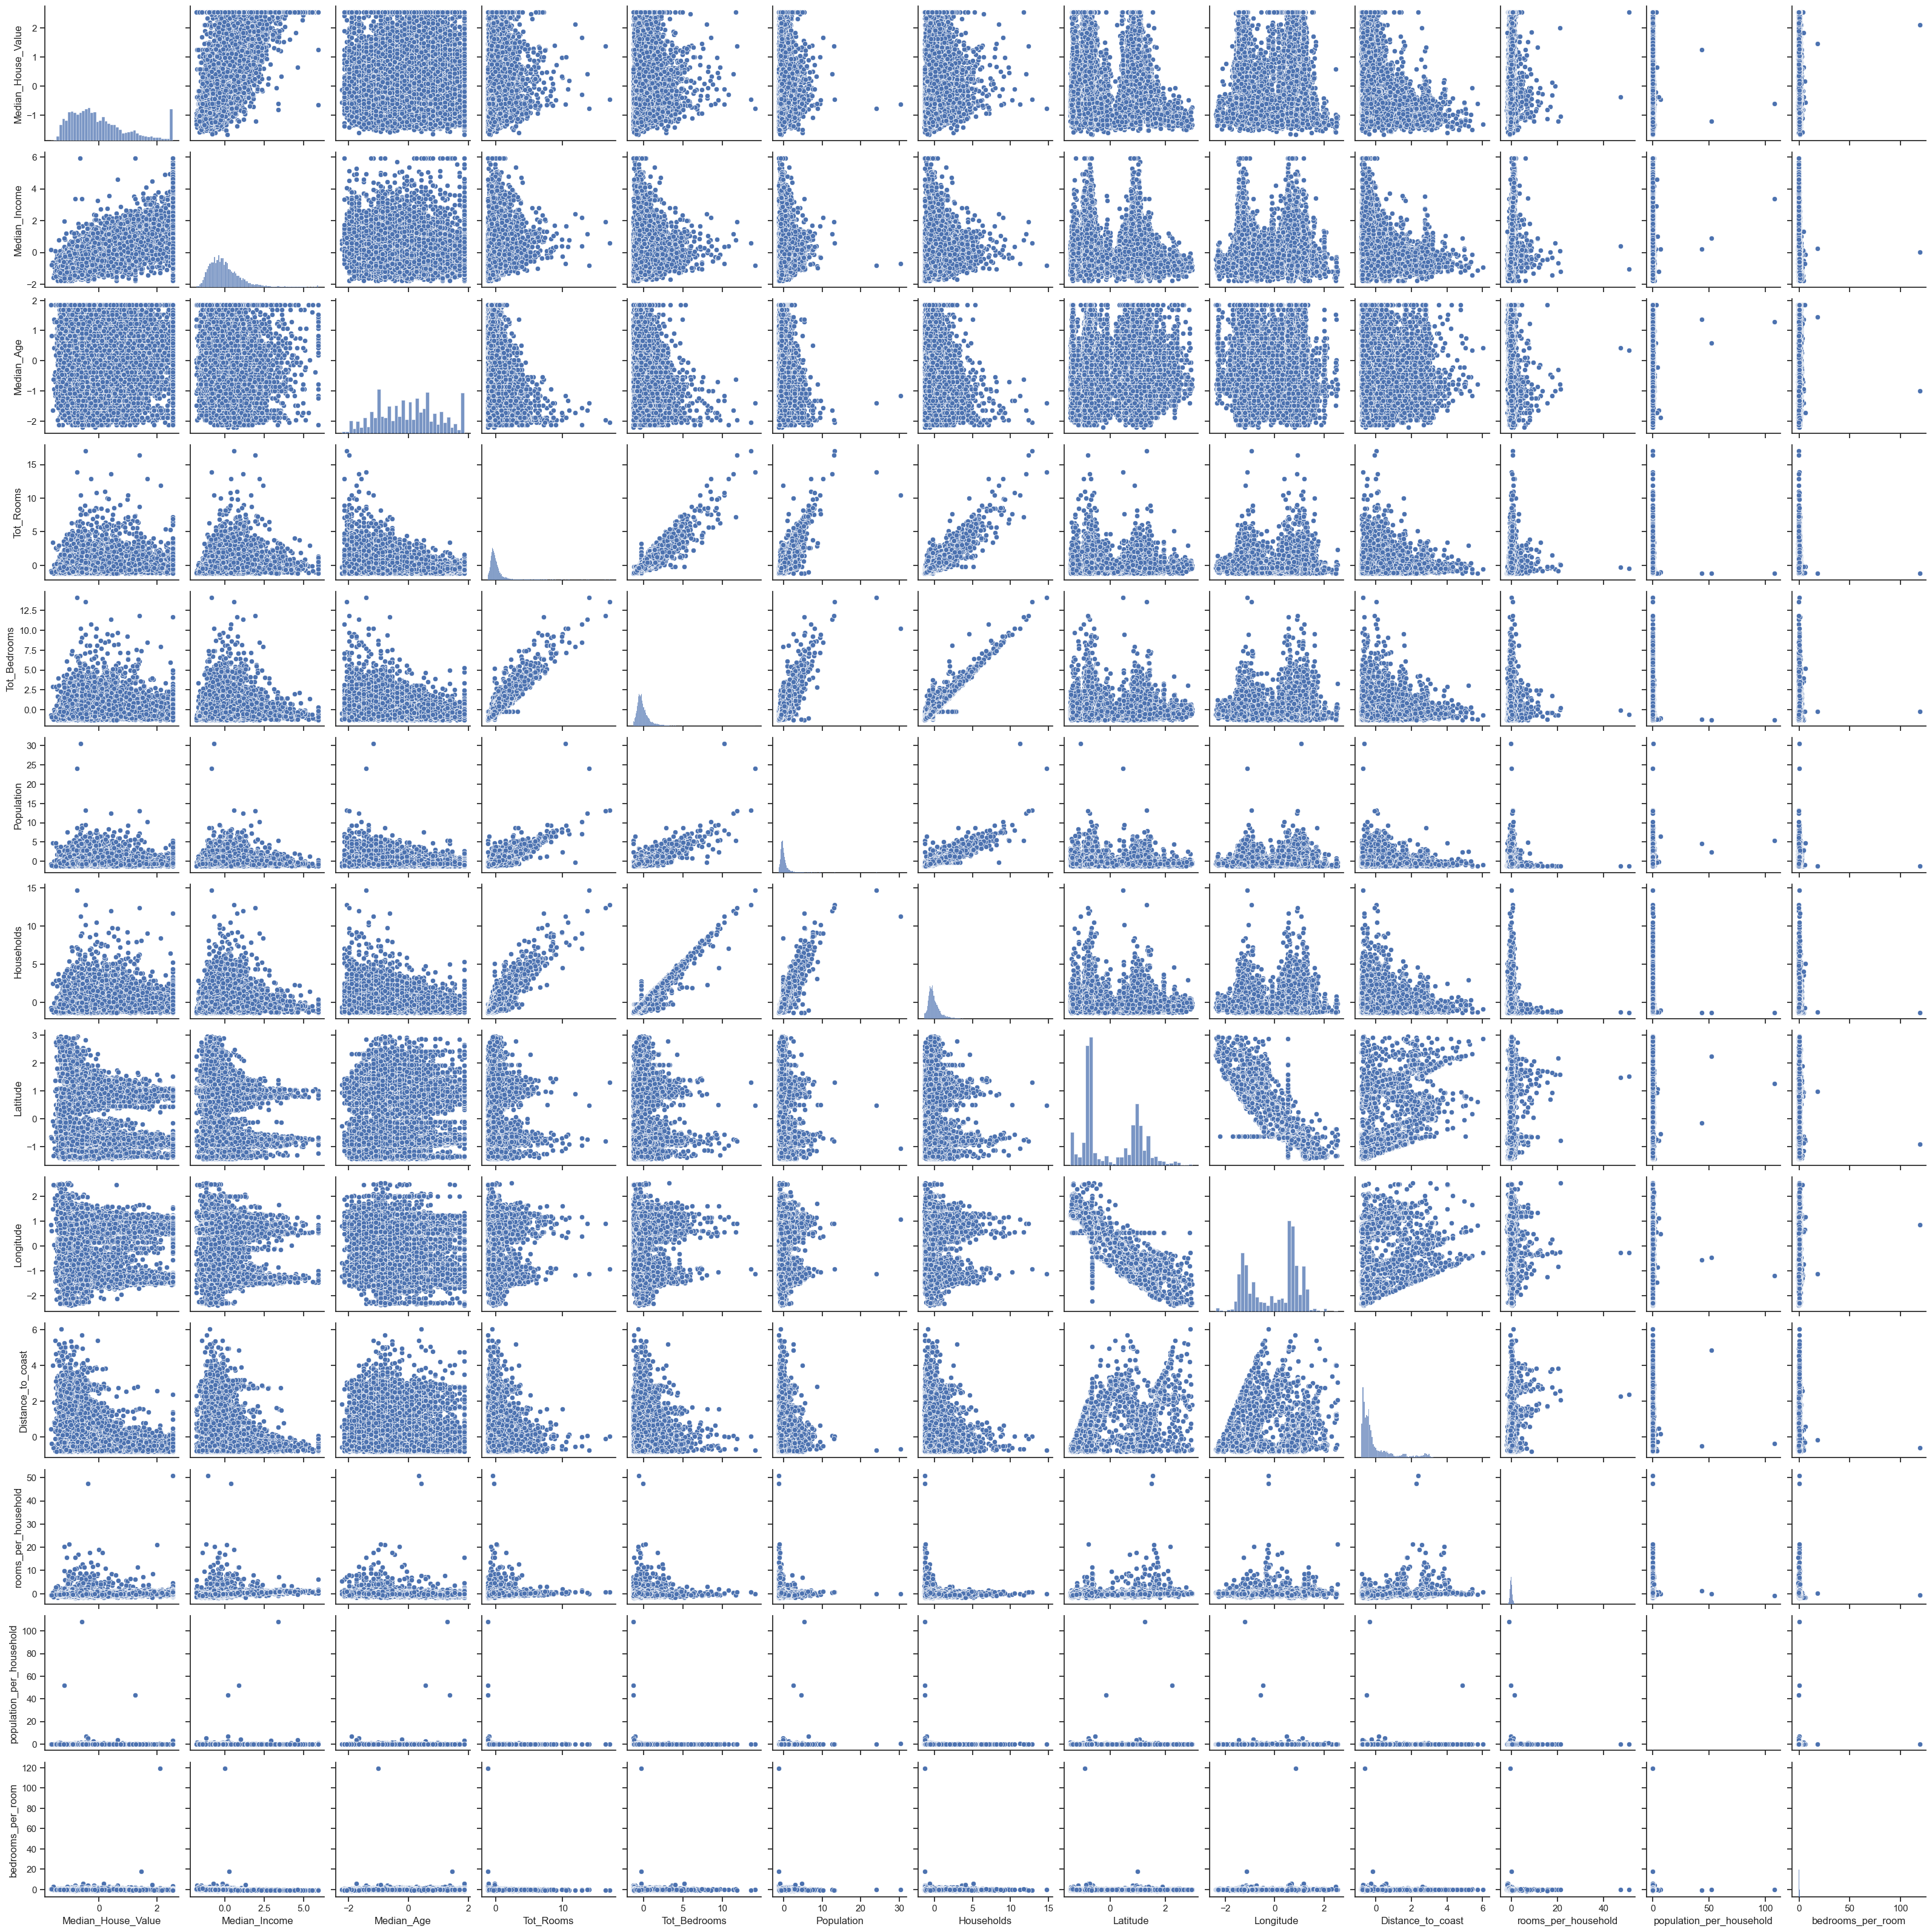

In [86]:
sns.pairplot(houses_quanti_df)

### 2.2.4 - Pipeline for the quantitative and categorical variables

Now let us include the categorical variables

In [87]:
# Column Transformer applies transformers to columns of an array or pandas DataFrame

from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer(
    [
        ("num", quanti_pipeline, quanti_features),
        (
            "cat",
            OHE(sparse=False),
            cat_features,
        ),
    ]
)

houses_ready = full_pipeline.fit_transform(train)

In [88]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['Median_House_Value', 'Median_Income',
                                  'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms',
                                  'Population', 'Households', 'Latitude',
                                  'Longitude', 'Distance_to_coast']),
                                ('cat', OneHotEncoder(sparse=False),
                                 ['Closest_city', 'income_cat'])])

In [89]:
houses_ready

array([[-0.21500961,  0.062339  , -1.48876523, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28751484,  1.81111997, -1.64819665, ...,  0.        ,
         0.        ,  1.        ],
       [-1.03259793, -0.0929676 ,  0.02583326, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.22940869, -0.59249018, -0.05388245, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.746502  ,  1.81494814, -1.01047097, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.17186276,  0.8211667 ,  0.82299036, ...,  0.        ,
         0.        ,  1.        ]])

In [90]:
houses_ready_df = pd.DataFrame(
    houses_ready,
    columns=list(houses_quanti_df.columns) + list(houses_onehot.columns),
    index=housing_df.index,
)

houses_ready_df.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
1405            -0.215010       0.062339   -1.488765   2.089937      2.763865   
17718            1.287515       1.811120   -1.648197   0.212516     -0.150166   
19928           -1.032598      -0.092968    0.025833  -0.102397     -0.241155   
13782           -0.886074      -1.310644   -0.053882   0.175877      0.386188   
18138            1.254569       0.715892    0.185265   0.331247      0.199422   

       Population  Households  Latitude  Longitude  Distance_to_coast  ...  \
1405     1.366089    2.658228  1.091262  -1.240337          -0.616043  ...   
17718    0.335176   -0.113171  0.795841  -1.095542          -0.183779  ...   
19928   -0.248712   -0.155362  0.322229   0.127727           2.746002  ...   
13782   -0.197166    0.335105 -0.751604   1.261122           0.972233  ...   
18138    0.161876    0.192711  0.800530  -1.210379          -0.485345  ...   

       bedrooms_per_room  Closest_city_LA  Closest_city_SanDiego  \
1405            0.122452              0.0                    0.0   
17718          -0.340682              0.0                    0.0   
19928          -0.188151              0.0                    0.0   
13782           0.094727              1.0                    0.0   
18138          -0.163634              0.0                    0.0   

       Closest_city_SanFrancisco  Closest_city_SanJose  income_cat_1  \
1405                         1.0                   0.0           0.0   
17718                        0.0                   1.0           0.0   
19928                        0.0                   1.0           0.0   
13782                        0.0                   0.0           1.0   
18138                        0.0                   1.0           0.0   

       income_cat_2  income_cat_3  income_cat_4  income_cat_5  
1405            0.0           0.0           1.0           0.0  
17718           0.0           0.0           0.0           1.0  
19928           0.0           1.0           0.0           0.0  
13782           0.0           0.0           0.0           0.0  
18138           0.0           0.0           0.0           1.0  

[5 rows x 22 columns]

**How many features should we have at this step ? Explain !**

In [91]:
## Justify your answer with a code here ##

In [92]:
calhouses = houses_ready_df.copy()

# Part 3 - Machine Learning

First of all, define the target (outcome) and the predictors (features)

In [93]:
# defining features and target
X_train = calhouses.iloc[:, 1:]
y_train = calhouses["Median_House_Value"]

## 3.1 - Learning and evaluating with the training set only

### Linear Regression
Start with the most classical Linear Regression <br>
Check that this algorithm does not use Ordinary Least Square with matrix inversion

In [94]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

In [95]:
linres = linreg.fit(X_train, y_train)

Estimate performance with Mean Squared Error and Mean Absolute Error

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# calculating performance metrics
y_pred = linreg.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
mae = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.36
Mean Absolute Error (MAE): 0.36
R-squared (R²): 0.64


### Decision Tree Regression

In [97]:
from sklearn.tree import DecisionTreeRegressor

# Instantiating a Decision Tree Regression model
treereg = DecisionTreeRegressor(random_state=42)

In [98]:
treereg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Estimate performance with Mean Squared Error and Mean Absolute Error

In [99]:
y_pred = treereg.predict(X_train)

# calculating performance metrics
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R²): 1.00


### Penalized Linear Regression (Elasticnet)

Elastic net is a combination of the two most popular regularized variants of linear regression: ridge and lasso. Ridge utilizes an L2 penalty and lasso uses an L1 penalty. With elastic net, you don't have to choose between these two models, because elastic net uses both the L2 and the L1 penalty.

L2 penalty function uses the sum of the squares of the parameters and Ridge Regression encourages this sum to be small. 
L1 penalty function uses the sum of the absolute values of the parameters and Lasso encourages this sum to be small.

In [100]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()

In [101]:
elastic_net.fit(X_train, y_train)

ElasticNet()

In [102]:
y_pred = elastic_net.predict(X_train)

# calculating performance metrics
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.84
Mean Absolute Error (MAE): 0.73
R-squared (R²): 0.16


**Comment on these first results**

*`` Decision Tree Regression performs better Elastic net which performs better than Linear Regression as indicated by the lower Mean Squared Error and Mean Absolute Error values as well as the higher R-squared value of 1.``*

### Random Forests

In [103]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

In [104]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [105]:
y_pred = rf_reg.predict(X_train)

# calculating performance metrics
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.10
R-squared (R²): 0.98


### Support Vector Machines

Radial Basis Function Support Vector Machine (RBF SVM) is a powerful machine learning algorithm that can be used for classification and regression tasks. It is a non-parametric model that works well with non-linear and high-dimensional data.

RBF SVM works by mapping the input data into a higher-dimensional feature space, where the classes can be separated by a hyperplane. The algorithm uses a kernel function, such as the Radial Basis Function, to measure the similarity between pairs of data points in the feature space.

In [106]:
from sklearn.svm import SVR

svm_reg = SVR(C=0.1)

In [107]:
svm_reg.get_params()

{'C': 0.1,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [108]:
svm_reg.fit(X_train, y_train)

SVR(C=0.1)

In [109]:
y_pred = svm_reg.predict(X_train)

# calculating performance metrics
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.27
Mean Absolute Error (MAE): 0.34
R-squared (R²): 0.73


## 3.2 - Estimating the models with *cross validation*

**Explain what the following function accomplishes**

In [110]:
from sklearn.model_selection import cross_val_score

# Updated the function


def display_scores(model, features, target):
    scores = cross_val_score(
        model, features, target
    )  # added cross_validation inside the function

    print("CV Scores:", scores)
    print("CV RMSE: ", np.sqrt(scores))
    print(f"CV Mean: {scores.mean():.2f}")
    print(f"CV Standard deviation: {scores.std(): .2f}")

***Compare the results of the evaluation (scores) using the training set with the evaluation (scores) using cross validation. <br>
What are your conclusions ?***

*``Your answers here``*

The mean gives you an idea of the central tendency or the average performance of the model across all cross-validation folds. A higher mean score typically indicates better model performance.

The standard deviation provides a measure of the spread or variability in the model's performance across different folds. A smaller standard deviation indicates more consistent performance.

### Linear Regression

In [111]:
# Validation performance
print("-----------the evaluation (scores) using the training set ----------")
print(f"the evaluation (scores):{linreg.score(X_train, y_train):.2f}")

# Crossvalidated performance
print("-----------the evaluation (scores) using cross validation----------")
display_scores(linreg, X_train, y_train)

-----------the evaluation (scores) using the training set ----------
the evaluation (scores):0.64
-----------the evaluation (scores) using cross validation----------
CV Scores: [0.61909806 0.62750697 0.64407339 0.46587748 0.66295344]
CV RMSE:  [0.78682785 0.79215337 0.80254183 0.68255218 0.81421953]
CV Mean: 0.60
CV Standard deviation:  0.07


### Decision Trees

In [112]:
# Validation performance
print("-----------the evaluation (scores) using the training set ----------")
print(f"the evaluation (scores):{treereg.score(X_train, y_train):.2f}")

# Crossvalidated performance
print("-----------the evaluation (scores) using cross validation----------")
display_scores(treereg, X_train, y_train)

-----------the evaluation (scores) using the training set ----------
the evaluation (scores):1.00
-----------the evaluation (scores) using cross validation----------
CV Scores: [0.61424157 0.64534493 0.68888572 0.6265065  0.63060682]
CV RMSE:  [0.78373565 0.80333364 0.8299914  0.79152164 0.79410757]
CV Mean: 0.64
CV Standard deviation:  0.03


### Penalised Linear Regression (Elasticnet)

In [113]:
# Validation performance
print("-----------the evaluation (scores) using the training set ----------")
print(f"the evaluation (scores):{elastic_net.score(X_train, y_train):.2f}")

# Crossvalidated performance
print("-----------the evaluation (scores) using cross validation----------")
display_scores(elastic_net, X_train, y_train)

-----------the evaluation (scores) using the training set ----------
the evaluation (scores):0.16
-----------the evaluation (scores) using cross validation----------
CV Scores: [0.15917726 0.15155348 0.15429524 0.15331403 0.16321131]
CV RMSE:  [0.39897025 0.38929871 0.39280433 0.39155335 0.40399419]
CV Mean: 0.16
CV Standard deviation:  0.00


### Random Forests

In [114]:
# Validation performance
print("-----------the evaluation (scores) using the training set ----------")
print(f"the evaluation (scores):{rf_reg.score(X_train, y_train):.2f}")

# Crossvalidated performance
print("-----------the evaluation (scores) using cross validation----------")
display_scores(rf_reg, X_train, y_train)

-----------the evaluation (scores) using the training set ----------
the evaluation (scores):0.98
-----------the evaluation (scores) using cross validation----------
CV Scores: [0.794732   0.81264417 0.83687885 0.8113557  0.82190251]
CV RMSE:  [0.89147743 0.90146779 0.91481082 0.90075285 0.90658839]
CV Mean: 0.82
CV Standard deviation:  0.01


### Support Vector Machines

In [115]:
# Validation performance
print("-----------the evaluation (scores) using the training set ----------")
print(f"the evaluation (scores):{svm_reg.score(X_train, y_train):.2f}")

# Crossvalidated performance
print("-----------the evaluation (scores) using cross validation----------")
display_scores(svm_reg, X_train, y_train)

-----------the evaluation (scores) using the training set ----------
the evaluation (scores):0.73
-----------the evaluation (scores) using cross validation----------
CV Scores: [0.69875799 0.71567374 0.74168071 0.71898108 0.74392478]
CV RMSE:  [0.83591746 0.84597503 0.86120887 0.84792752 0.86251074]
CV Mean: 0.72
CV Standard deviation:  0.02


## 3.3 - Tuning the model with Grid Search and Randomized Search

In [122]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [117]:
# Used ChatGPT to understand this section

In [123]:
# defining the function to print the scores of a model after the grid and random search


def Grid_Randomized(model, params):
    rf_random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,  # defines number of cross-validation folds
        verbose=2,
        random_state=42,
        n_jobs=-1,  # specifies the number of CPU cores to use for parallel processing during the search. Setting it to -1 means using all available cores for faster computation.
    )
    rf_random.fit(X_train, y_train)
    rf_best_random = rf_random.best_estimator_

    y_pred = rf_best_random.predict(X_train)

    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)

    print("---------------------- Randomized Search ----------------------")
    print("Parameters : ")
    print(rf_best_random.get_params())
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.2f}\n\n")

    rf_grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=3,  # defines the number of cross-validation folds
        verbose=2,
        n_jobs=-1,  # specifies the number of CPU cores to use for parallel processing during the search
    )
    rf_grid_search.fit(X_train, y_train)
    rf_best_grid = rf_grid_search.best_estimator_

    y_pred = rf_best_grid.predict(X_train)

    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)

    print("---------------------- Grid Search ----------------------")
    print(" Parameters :")
    print(rf_best_grid.get_params())
    print(f"\n Mean Squared Error (MSE): {mse:.2f}")
    print(f"\n Mean Absolute Error (MAE): {mae:.2f}")
    print(f"\n R-squared (R²): {r2:.2f}\n\n\n")
    return rf_best_random, rf_best_grid

### Example : Random Forest

In [124]:
rf_grid = {"n_estimators": [30, 60, 100], "max_features": [8, 10, 15]}
rf_best_random, rf_best_grid = Grid_Randomized(rf_reg, rf_grid)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
---------------------- Randomized Search ----------------------
Parameters : 
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 10, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Mean Squared Error (MSE): 0.03
Mean Absolute Error (MAE): 0.10
R-squared (R²): 0.97


Fitting 3 folds for each of 9 candidates, totalling 27 fits
---------------------- Grid Search ----------------------
 Parameters :
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 15, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_est

### Example : ElasticNet

In [125]:
en_grid = {"alpha": np.logspace(-3, 4, 10), "l1_ratio": np.linspace(0, 1, 11)}
en_best_random, en_best_grid = Grid_Randomized(elastic_net, en_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------------- Randomized Search ----------------------
Parameters : 
{'alpha': 0.03593813663804628, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.2, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Mean Squared Error (MSE): 0.37
Mean Absolute Error (MAE): 0.45
R-squared (R²): 0.63


Fitting 3 folds for each of 110 candidates, totalling 330 fits
---------------------- Grid Search ----------------------
 Parameters :
{'alpha': 0.03593813663804628, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.2, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}

 Mean Squared Error (MSE): 0.37

 Mean Absolute Error (MAE): 0.45

 R-squared (R²): 0.63





### Example Decision Tree

In [126]:
cart_grid = {"min_samples_split": range(1, 10), "min_samples_leaf": range(1, 60)}
cart_best_random, cart_best_grid = Grid_Randomized(treereg, cart_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------------- Randomized Search ----------------------
Parameters : 
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 21, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Mean Squared Error (MSE): 0.17
Mean Absolute Error (MAE): 0.27
R-squared (R²): 0.83


Fitting 3 folds for each of 531 candidates, totalling 1593 fits
---------------------- Grid Search ----------------------
 Parameters :
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 21, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}

 Mean Squared Error (MSE): 0.17

 Mean Absolute Error (MAE): 0.27

 R-squared (R²): 0.83





RandomizedSearchCV over GridSearchCV is that RandomizedSearchCV can be more efficient if the search space is large since it only samples a subset of the possible combinations rather than evaluating them all.

## 3.4 - Final question : how good are our models in predicting unseen data ?

In [127]:
# Start by checking the structure of the test set (code) #
test_strat.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
15498            237400.0         7.7450           4       1862           291   
18440            234400.0         4.5000          21       3250           610   
15672            500001.0         7.9761          52       3161           472   
6362             142900.0         4.0083          37       1447           309   
13036            121900.0         3.0000          37       1252           267   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
15498         685         248     33.10    -117.23        8276.875403   
18440        1978         568     37.24    -121.81       34060.842722   
15672         842         410     37.80    -122.44         540.917690   
6362         1279         290     34.13    -117.98       45394.112809   
13036         686         256     38.68    -121.17       75996.580919   

       Closest_city income_cat  
15498      SanDiego          5  
18440       SanJose          4  
15672  SanFrancisco          5  
6362             LA          4  
13036  SanFrancisco          2

**Prepare your test set to be evaluated on the tuned models**

In [128]:
# Column Transformer applies transformers to columns of an array or pandas DataFrame

test_array = full_pipeline.fit_transform(test_strat)
houses_test = pd.DataFrame(
    test_array,
    columns=list(houses_quanti_df.columns) + list(houses_onehot.columns),
    index=test_strat.index,
)

houses_test.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
15498            0.262243       1.967973   -1.944966  -0.348328     -0.577935   
18440            0.236293       0.310632   -0.597729   0.265893      0.160384   
15672            2.533747       2.086004    1.858997   0.226508     -0.159014   
6362            -0.555183       0.059503    0.670259  -0.531975     -0.536275   
13036           -0.736834      -0.455473    0.670259  -0.618267     -0.633483   

       Population  Households  Latitude  Longitude  Distance_to_coast  ...  \
15498   -0.652017   -0.647036 -1.169359   1.151264          -0.651007  ...   
18440    0.485836    0.171898  0.772141  -1.149322          -0.142783  ...   
15672   -0.513856   -0.232451  1.034760  -1.465778          -0.803489  ...   
6362    -0.129291   -0.539551 -0.686329   0.774531           0.080606  ...   
13036   -0.651137   -0.626563  1.447446  -0.827843           0.683807  ...   

       bedrooms_per_room  Closest_city_LA  Closest_city_SanDiego  \
15498          -0.990790              0.0                    1.0   
18440          -0.448138              0.0                    0.0   
15672          -1.111103              0.0                    0.0   
6362           -0.001474              1.0                    0.0   
13036          -0.006424              0.0                    0.0   

       Closest_city_SanFrancisco  Closest_city_SanJose  income_cat_1  \
15498                        0.0                   0.0           0.0   
18440                        0.0                   1.0           0.0   
15672                        1.0                   0.0           0.0   
6362                         0.0                   0.0           0.0   
13036                        1.0                   0.0           0.0   

       income_cat_2  income_cat_3  income_cat_4  income_cat_5  
15498           0.0           0.0           0.0           1.0  
18440           0.0           0.0           1.0           0.0  
15672           0.0           0.0           0.0           1.0  
6362            0.0           0.0           1.0           0.0  
13036           1.0           0.0           0.0           0.0  

[5 rows x 22 columns]

Not sure if we needed standard scaler for the test set.

In [129]:
X_test = houses_test.iloc[:, 1:]
y_test = houses_test["Median_House_Value"]

In [130]:
"""scaler = StandardScaler()
y_test_np = y_test.values
y_test_scaled = scaler.fit_transform(y_test_np.reshape(-1, 1))"""

'scaler = StandardScaler()\ny_test_np = y_test.values\ny_test_scaled = scaler.fit_transform(y_test_np.reshape(-1, 1))'

### Random Forest

In [131]:
y_pred_scaled = rf_best_random.predict(X_test)

scaler = StandardScaler()

y_test_np = y_test.values
scaler.fit_transform(y_test_np.reshape(-1, 1))

y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred_random = scaler.inverse_transform(y_pred_scaled)

mse_random = mean_squared_error(y_test, y_pred_random)
mae_random = mean_absolute_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print("---------------------- Randomized Search ----------------------")
print(f"Mean Squared Error (MSE): {mse_random:.2f}")
print(f"Mean Absolute Error (MAE): {mae_random:.2f}")
print(f"R-squared (R²): {r2_random:.2f}")

---------------------- Randomized Search ----------------------
Mean Squared Error (MSE): 0.28
Mean Absolute Error (MAE): 0.40
R-squared (R²): 0.72


In [132]:
y_pred_scaled = rf_best_grid.predict(X_test)

scaler = StandardScaler()

y_test_np = y_test.values
scaler.fit_transform(y_test_np.reshape(-1, 1))

y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred_grid = scaler.inverse_transform(y_pred_scaled)

mse_grid = mean_squared_error(y_test, y_pred_grid)
mae_grid = mean_absolute_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)
print("---------------------- Grid Search ----------------------")
print(f"Mean Squared Error (MSE): {mse_grid:.2f}")
print(f"Mean Absolute Error (MAE): {mae_grid:.2f}")
print(f"R-squared (R²): {r2_grid:.2f}")

---------------------- Grid Search ----------------------
Mean Squared Error (MSE): 0.29
Mean Absolute Error (MAE): 0.40
R-squared (R²): 0.71


In [133]:
# The best model is the first one (rf_best_random)

### ElaticNet

In [134]:
y_pred_scaled = en_best_random.predict(X_test)

scaler = StandardScaler()

y_test_np = y_test.values
scaler.fit_transform(y_test_np.reshape(-1, 1))

y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred_random = scaler.inverse_transform(y_pred_scaled)

mse_random = mean_squared_error(y_test, y_pred_random)
mae_random = mean_absolute_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print("---------------------- Randomized Search ----------------------")
print(f"Mean Squared Error (MSE): {mse_random:.2f}")
print(f"Mean Absolute Error (MAE): {mae_random:.2f}")
print(f"R-squared (R²): {r2_random:.2f}")

---------------------- Randomized Search ----------------------
Mean Squared Error (MSE): 0.37
Mean Absolute Error (MAE): 0.45
R-squared (R²): 0.63


In [135]:
y_pred_scaled = en_best_grid.predict(X_test)

scaler = StandardScaler()

y_test_np = y_test.values
scaler.fit_transform(y_test_np.reshape(-1, 1))

y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred_random = scaler.inverse_transform(y_pred_scaled)

mse_random = mean_squared_error(y_test, y_pred_random)
mae_random = mean_absolute_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print("---------------------- Grid Search ----------------------")
print(f"Mean Squared Error (MSE): {mse_random:.2f}")
print(f"Mean Absolute Error (MAE): {mae_random:.2f}")
print(f"R-squared (R²): {r2_random:.2f}")

---------------------- Grid Search ----------------------
Mean Squared Error (MSE): 0.37
Mean Absolute Error (MAE): 0.45
R-squared (R²): 0.63


In [296]:
# The two of them are similar

### Decision Tree

In [136]:
y_pred_scaled = cart_best_random.predict(X_test)

scaler = StandardScaler()

y_test_np = y_test.values
scaler.fit_transform(y_test_np.reshape(-1, 1))

y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred_random = scaler.inverse_transform(y_pred_scaled)

mse_random = mean_squared_error(y_test, y_pred_random)
mae_random = mean_absolute_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print("---------------------- Randomized Search ----------------------")
print(f"Mean Squared Error (MSE): {mse_random:.2f}")
print(f"Mean Absolute Error (MAE): {mae_random:.2f}")
print(f"R-squared (R²): {r2_random:.2f}")

---------------------- Randomized Search ----------------------
Mean Squared Error (MSE): 0.34
Mean Absolute Error (MAE): 0.41
R-squared (R²): 0.66


In [137]:
y_pred_scaled = cart_best_grid.predict(X_test)

scaler = StandardScaler()

y_test_np = y_test.values
scaler.fit_transform(y_test_np.reshape(-1, 1))

y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred_random = scaler.inverse_transform(y_pred_scaled)

mse_random = mean_squared_error(y_test, y_pred_random)
mae_random = mean_absolute_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print("---------------------- Grid Search ----------------------")
print(f"Mean Squared Error (MSE): {mse_random:.2f}")
print(f"Mean Absolute Error (MAE): {mae_random:.2f}")
print(f"R-squared (R²): {r2_random:.2f}")

---------------------- Grid Search ----------------------
Mean Squared Error (MSE): 0.34
Mean Absolute Error (MAE): 0.41
R-squared (R²): 0.66


In [138]:
# The two of them are similar

### Linear Regression

In [139]:
y_pred_scaled = linreg.predict(X_test)

scaler = StandardScaler()

y_test_np = y_test.values
scaler.fit_transform(y_test_np.reshape(-1, 1))

y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred = scaler.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.35
Mean Absolute Error (MAE): 0.43
R-squared (R²): 0.65


### SVM Regression

In [140]:
y_pred_scaled = svm_reg.predict(X_test)

scaler = StandardScaler()

y_test_np = y_test.values
scaler.fit_transform(y_test_np.reshape(-1, 1))

y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred = scaler.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.27
Mean Absolute Error (MAE): 0.36
R-squared (R²): 0.73


## Estimate the performance of your test set on the SVM model #

In [142]:
y_pred = svm_reg.predict(X_test)

In [143]:
# calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.27
Mean Absolute Error (MAE): 0.36
R-squared (R²): 0.73


# Machine Learning Conclusion
**In the light of all these information, what have your learned about :**
1. Overfitting
2. Tuning a learner
3. Model performance
4. Else ?
Please write a complete but synthetic essay on your learning experience